In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# **Import Dataset**

In [ ]:
url = 'https://drive.google.com/file/d/19TUlAkMBRQi4MKfimeYBxCrFSeYk0ZGr/view'
path = 'https://drive.google.com/u/0/uc?id=19TUlAkMBRQi4MKfimeYBxCrFSeYk0ZGr&export=download'+url.split('/')[-2]
df = pd.read_csv(path)
df.head(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


# **Data Exploration & Preparation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

Number of rows: 2240
Number of columns 30


## **About the Dataset**
**Overview:**<br>
- Dataset contains 2240 rows, 28 features, 1 **ID** column and 1 redundant **Unnamed: 0** index column which is removed.
- Dataset consists of 3 data types; float64, int64 and object
- **Dt_Customer** column could be changed into datetime data type
- Dataset contains 24 Null Values from the **Income** feature
<br><br>

**Columns/Features:**<br>
- **AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response** - 1 if customer accepted the offer in the last campaign, 0 otherwise
- **Complain** - 1 if customer complained in the last 2 years
- **Dt_Customer** - date of customer’s enrolment with the company
- **Education** - customer’s level of education
- **Marital** - customer’s marital status
- **Kidhome** - number of small children in customer’s household
- **Teenhome** - number of teenagers in customer’s household
- **Income** - customer’s yearly household income
- **MntFishProducts** - amount spent on fish products in the last 2 years
- **MntMeatProducts** - amount spent on meat products in the last 2 years
- **MntFruits** - amount spent on fruits products in the last 2 years
- **MntSweetProducts** - amount spent on sweet products in the last 2 years
- **MntWines** - amount spent on wine products in the last 2 years
- **MntGoldProds** - amount spent on gold products in the last 2 years
- **NumDealsPurchases** - number of purchases made with discount
- **NumCatalogPurchases** - number of purchases made using catalogue
- **NumStorePurchases** - number of purchases made directly in stores
- **NumWebPurchases** - number of purchases made through company’s web site
- **NumWebVisitsMonth** - number of visits to company’s web site in the last month
- **Recency** - number of days since the last purchase
- **Z_CostContact** - cost to contact customer
- **Z_Revenue** - revenue after client accepts campaign


## **Changing inappropriate data type**

In [ ]:
# Converting DtCustomer column into datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   datetime64[ns]
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

# **Feature Engineering**

## Constructing new column: Total Spending

In [ ]:
df['Total_Spending'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

## Constructing new column: Total Accepted Campaign

In [ ]:
df['Total_Acc'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

## Constructing new column: Total Purchases

In [ ]:
df['Total_Purchases'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

## Constructing new column: Total Children

In [ ]:
df['Total_Children'] = df['Kidhome']+df['Teenhome']

## Constructing new column: Conversion Rate

Conversion Rate is defined as: # Response / # visits

In [ ]:
# Conversion rate function
def conv(i, j):
    if j == 0:
        j = 1
    return i/j

In [ ]:
df['Conversion_Rate'] = df.apply(lambda x: conv(x['Total_Acc'], x['NumWebVisitsMonth']), axis = 1)

## Constructing new column: Age

In [ ]:
df['Dt_Customer'].max().year

2014

Since the latest enrollment to the company is in 2014, then it is assumed the dataset is from 2014.

In [ ]:
df['Age'] = 2014 - df['Year_Birth']

## Segmenting age into groups

**Groups to be made:**
- Young Adult : <= 35 years
- Adult : 36-45 years
- Middle Age : 46-55
- Late Middle Age : 56-65
- Senior : 66-75
- Elderly : > 76

In [ ]:
# Age group function
def ag(x):
    if x <= 35:
        group = 'Young Adult'
    elif x > 35 and x <= 45:
        group = 'Adult'
    elif x > 45 and x <= 55:
        group = 'Middle Age'
    elif x > 55 and x <= 65:
        group = 'Late Middle Age'
    elif x > 65 and x <= 75:
        group = 'Senior'
    else:
        group = 'Elderly'
    return group

In [ ]:
df['Age_Group'] = df.apply(lambda x: ag(x['Age']), axis = 1)

## Grouping marital status

In [ ]:
df['Has_Partner'] = np.where((df['Marital_Status']=='Bertunangan')|(df['Marital_Status']=='Menikah'), 'Yes', 'No')
df[['Marital_Status', 'Has_Partner']]

,Marital_Status,Has_Partner
0,Lajang,No
1,Lajang,No
2,Bertunangan,Yes
3,Bertunangan,Yes
4,Menikah,Yes
...,...,...
2235,Menikah,Yes
2236,Bertunangan,Yes
2237,Cerai,No
2238,Bertunangan,Yes


## Final look of data

In [ ]:
pd.set_option('display.max_columns',None)
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spending,Total_Acc,Total_Purchases,Total_Children,Conversion_Rate,Age
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,6.057982e+05,0.446875,14.862054,0.950446,0.149701,45.194196
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,6.022493e+05,0.890543,7.677173,0.751803,0.428179,11.984069
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000e+03,0.000000,0.000000,0.000000,0.000000,18.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,6.875000e+04,0.000000,8.000000,0.000000,0.000000,37.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,3.960000e+05,0.000000,15.000000,1.000000,0.000000,44.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.045500e+06,1.000000,21.000000,1.000000,0.125000,55.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2.525000e+06,5.000000,44.000000,3.000000,5.000000,121.000000


In [ ]:
# data overview
result = []
for col in df.columns:
    result.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])

output = pd.DataFrame(data=result, columns = 'column data_type no._null percent_null no._unique unique_sample'.split())
output

,column,data_type,no._null,percent_null,no._unique,unique_sample
0,Unnamed: 0,int64,0,0.000000,2240,"[0, 1, 2, 3, 4]"
1,ID,int64,0,0.000000,2240,"[5524, 2174, 4141, 6182, 5324]"
2,Year_Birth,int64,0,0.000000,59,"[1957, 1954, 1965, 1984, 1981]"
3,Education,object,0,0.000000,5,"[S1, S3, S2, SMA, D3]"
4,Marital_Status,object,0,0.000000,6,"[Lajang, Bertunangan, Menikah, Cerai, Janda]"
5,Income,float64,24,1.071429,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000...."
6,Kidhome,int64,0,0.000000,3,"[0, 1, 2]"
7,Teenhome,int64,0,0.000000,3,"[0, 1, 2]"
8,Dt_Customer,datetime64[ns],0,0.000000,663,"[2012-09-04T00:00:00.000000000, 2014-03-08T00:..."
9,Recency,int64,0,0.000000,100,"[58, 38, 26, 94, 16]"


## Dropping unnecessary columns for EDA

In [ ]:
acc_cmp = [col for col in df.columns if 'AcceptedCmp' in col or 'Response' in col]
dropped = acc_cmp+['Year_Birth', 'Kidhome', 'Teenhome', 'Marital_Status']
df_final = df.drop(columns=dropped)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Dt_Customer          2240 non-null   datetime64[ns]
 5   Recency              2240 non-null   int64         
 6   MntCoke              2240 non-null   int64         
 7   MntFruits            2240 non-null   int64         
 8   MntMeatProducts      2240 non-null   int64         
 9   MntFishProducts      2240 non-null   int64         
 10  MntSweetProducts     2240 non-null   int64         
 11  MntGoldProds         2240 non-null   int64         
 12  NumDealsPurchases    2240 non-null   int64         
 13  NumWebPurchases      2240 non-nul

# **Exploratory Data Analysis**

In [ ]:
# data overview
result = []
for col in df_final.columns:
    result.append([col, df_final[col].dtype, df_final[col].isna().sum(), 100*df_final[col].isna().sum()/len(df_final[col]), df_final[col].nunique(), df_final[col].unique()[:5]])

output = pd.DataFrame(data=result, columns = 'column data_type no._null percent_null no._unique unique_sample'.split())
output

,column,data_type,no._null,percent_null,no._unique,unique_sample
0,Unnamed: 0,int64,0,0.000000,2240,"[0, 1, 2, 3, 4]"
1,ID,int64,0,0.000000,2240,"[5524, 2174, 4141, 6182, 5324]"
2,Education,object,0,0.000000,5,"[S1, S3, S2, SMA, D3]"
3,Income,float64,24,1.071429,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000...."
4,Dt_Customer,datetime64[ns],0,0.000000,663,"[2012-09-04T00:00:00.000000000, 2014-03-08T00:..."
5,Recency,int64,0,0.000000,100,"[58, 38, 26, 94, 16]"
6,MntCoke,int64,0,0.000000,776,"[635000, 11000, 426000, 173000, 520000]"
7,MntFruits,int64,0,0.000000,158,"[88000, 1000, 49000, 4000, 43000]"
8,MntMeatProducts,int64,0,0.000000,558,"[546000, 6000, 127000, 20000, 118000]"
9,MntFishProducts,int64,0,0.000000,182,"[172000, 2000, 111000, 10000, 46000]"


## **Univariate analysis**

In [ ]:
# Creating list of numerical non singular and categorical columns
nums = [col for col in df_final.columns if (df_final[col].dtype == 'int64' or df_final[col].dtype == 'float64') and col != 'Complain' and col != 'ID' and col != 'Z_CostContact' and col != 'Z_Revenue' and col != 'Unnamed: 0']
cats = [col for col in df_final.columns if df_final[col].dtype == 'object' or col == 'Complain']


In [ ]:
# Changing data type of the complain column into category
df['Complain'] = df['Complain'].astype('category')

In [ ]:
df_final[nums].describe().round(2)

,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Spending,Total_Acc,Total_Purchases,Total_Children,Conversion_Rate,Age
count,2.216000e+03,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5.224725e+07,49.11,303935.71,26302.23,166950.00,37525.45,27062.95,44021.88,2.33,4.08,2.66,5.79,5.32,605798.21,0.45,14.86,0.95,0.15,45.19
std,2.517308e+07,28.96,336597.39,39773.43,225715.37,54628.98,41280.50,52167.44,1.93,2.78,2.92,3.25,2.43,602249.29,0.89,7.68,0.75,0.43,11.98
min,1.730000e+06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5000.00,0.00,0.00,0.00,0.00,18.00
25%,3.530300e+07,24.00,23750.00,1000.00,16000.00,3000.00,1000.00,9000.00,1.00,2.00,0.00,3.00,3.00,68750.00,0.00,8.00,0.00,0.00,37.00
50%,5.138150e+07,49.00,173500.00,8000.00,67000.00,12000.00,8000.00,24000.00,2.00,4.00,2.00,5.00,6.00,396000.00,0.00,15.00,1.00,0.00,44.00
75%,6.852200e+07,74.00,504250.00,33000.00,232000.00,50000.00,33000.00,56000.00,3.00,6.00,4.00,8.00,7.00,1045500.00,1.00,21.00,1.00,0.12,55.00
max,6.666660e+08,99.00,1493000.00,199000.00,1725000.00,259000.00,263000.00,362000.00,15.00,27.00,28.00,13.00,20.00,2525000.00,5.00,44.00,3.00,5.00,121.00


In [ ]:
df[cats].describe(include=['object', 'category'])

,Education,Complain,Age_Group,Has_Partner
count,2240,2240,2240,2240
unique,5,2,6,2
top,S1,0,Adult,Yes
freq,1127,2219,758,1444


### Numerical univariate analysis

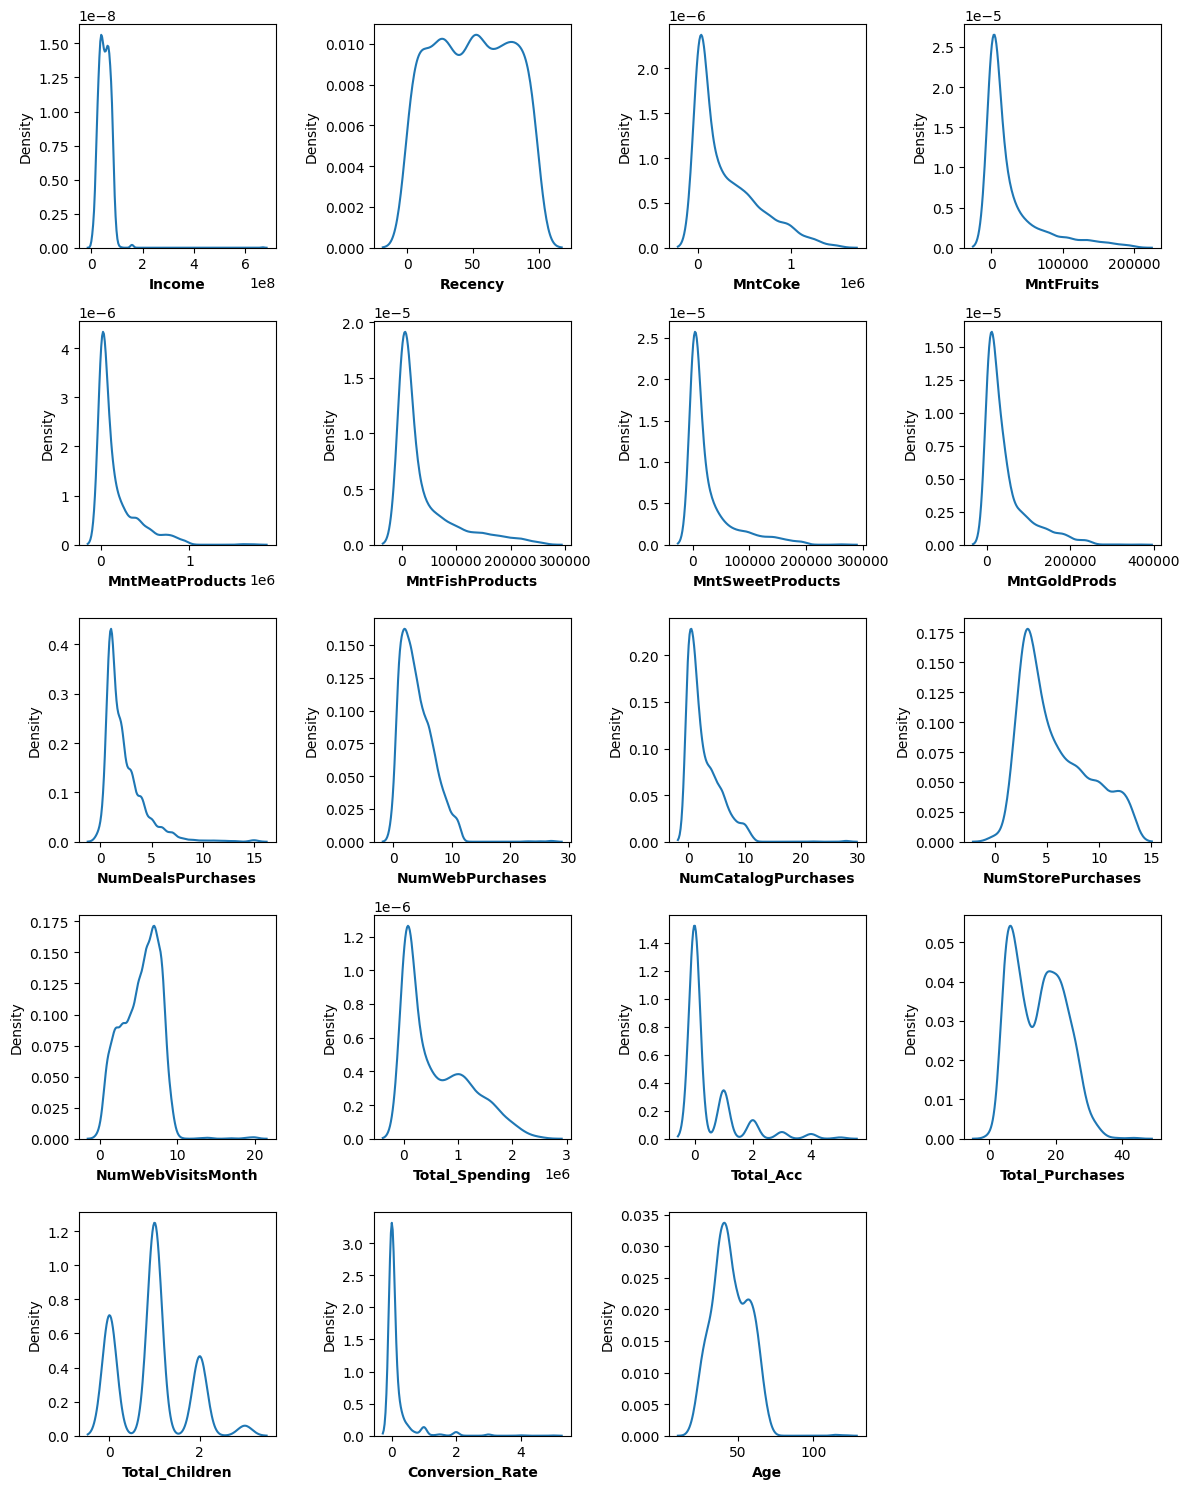

In [ ]:
plt.figure(figsize = (12,15))
for i in range(len(nums)):
    plt.subplot(round((len(nums)/4)), 4, i+1)
    sns.kdeplot(df_final[nums[i]])
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.tight_layout()

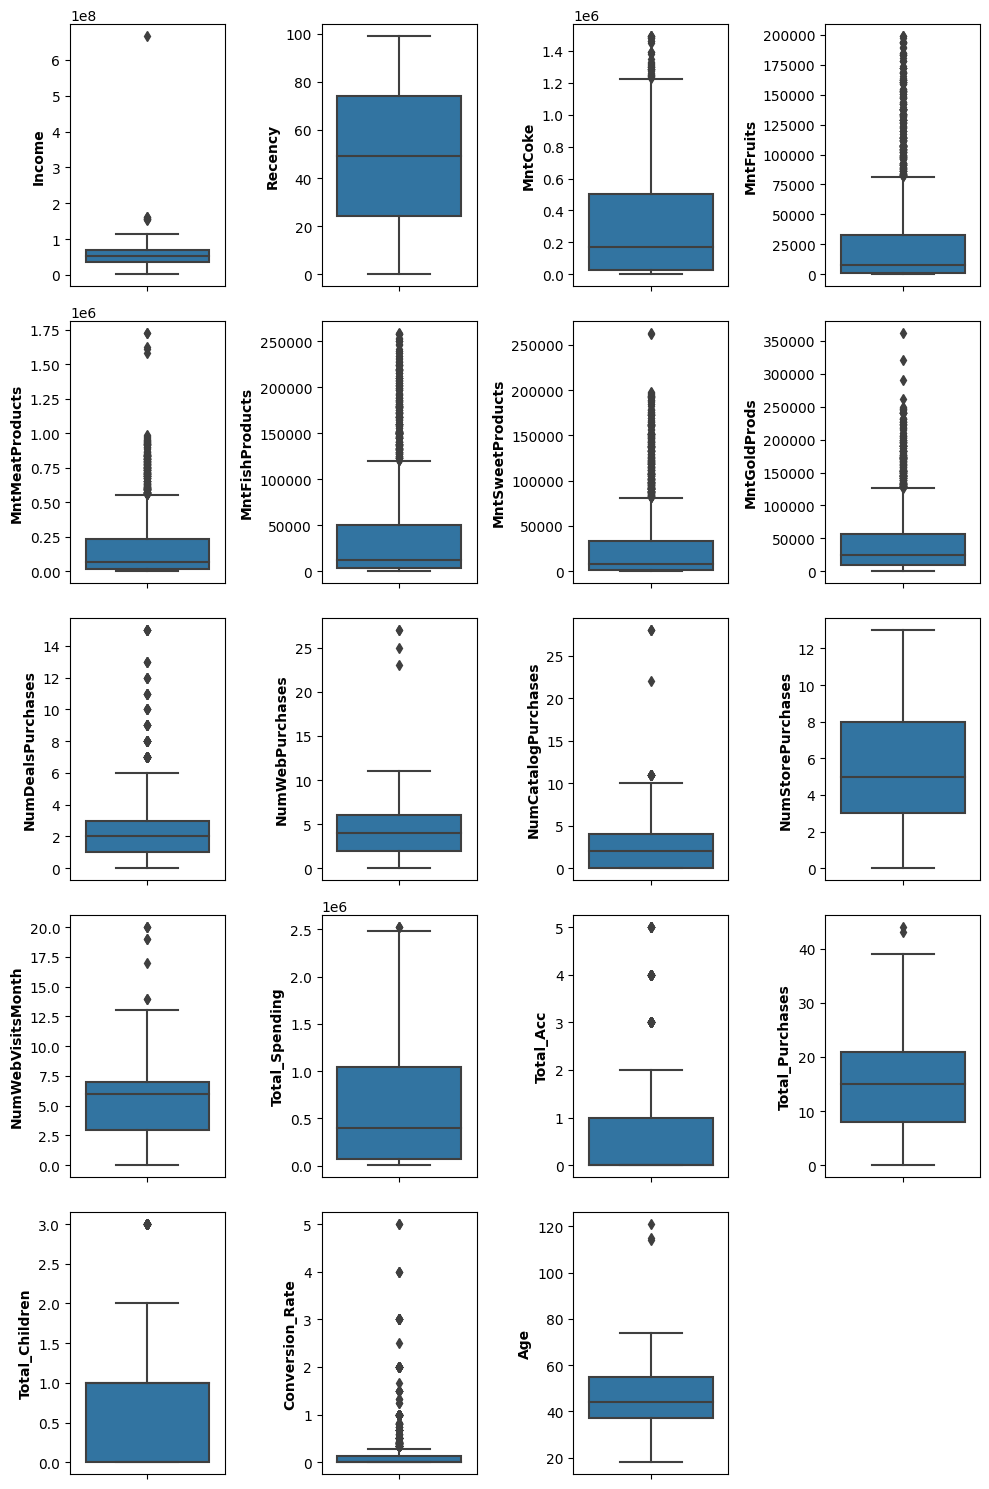

In [ ]:
plt.figure(figsize=(10, 15))
for i in range(len(nums)):
    plt.subplot(round((len(nums)/4)), 4, i+1)
    sns.boxplot(y = df_final[nums[i]])
    plt.ylabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.tight_layout()

**Analysis:**
- There are positive outliers in every numerical feature except **NumStorePurchases** and **Recency**
- All numerical features have a right skewed distribution except **Recency**
- **Recency** is uniformly distributed
- **Income** and **Age** features have the most significant outliers

### Categorical univariate analysis

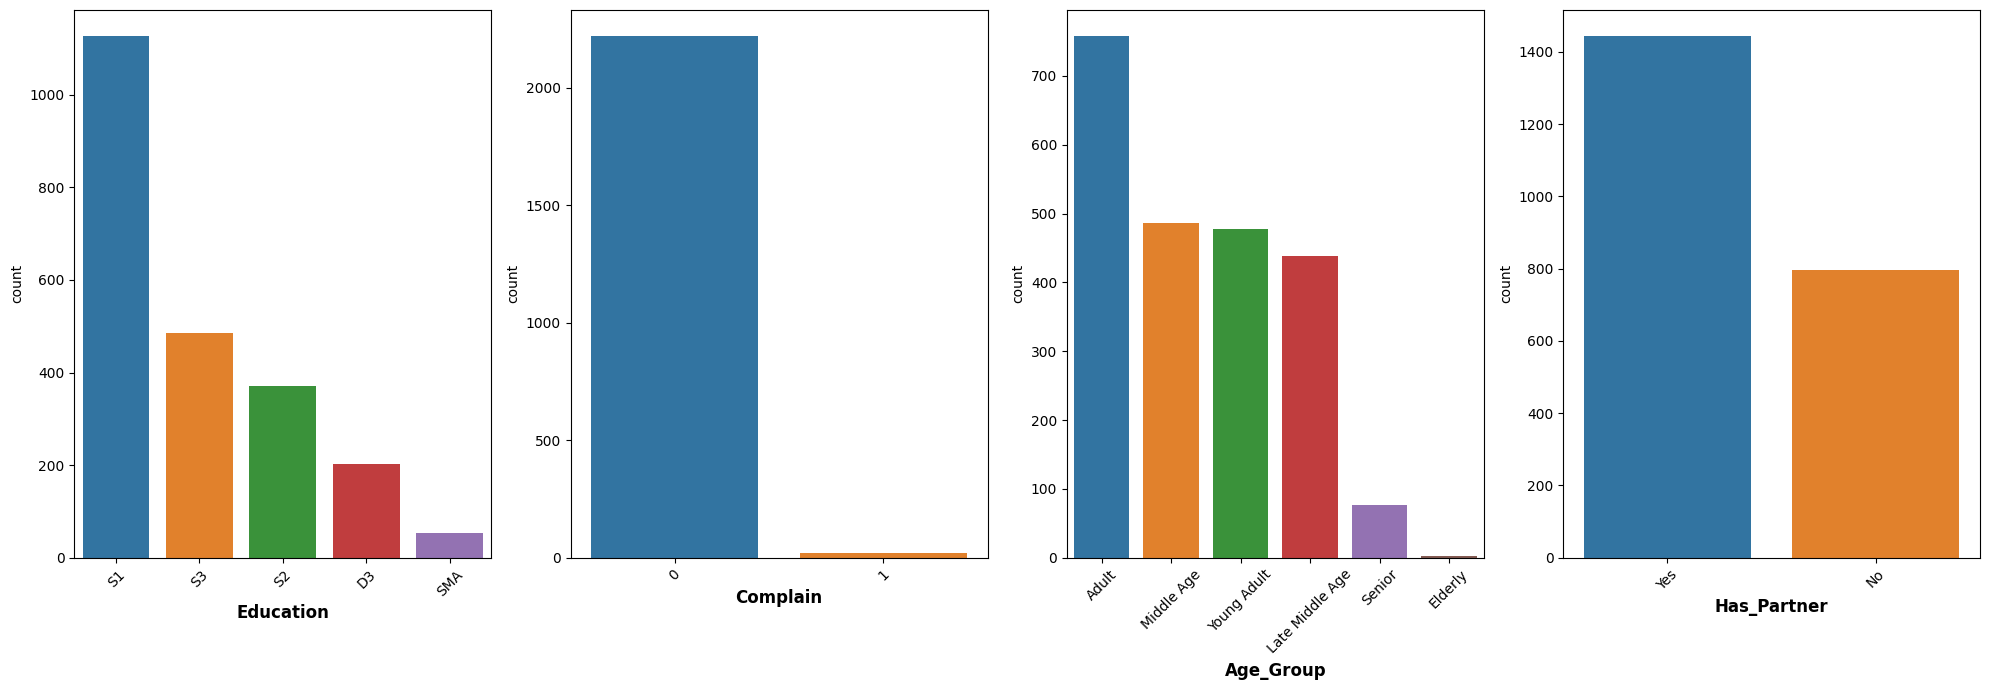

In [ ]:
plt.figure(figsize=(20,7))
for i in range(len(cats)):
    order = df_final[cats[i]].value_counts().index
    plt.subplot(1, len(cats), i+1)
    sns.countplot(x = df_final[cats[i]], data = df_final, order=order)
    plt.xticks(rotation=45)
    plt.xlabel(cats[i], fontsize=12, fontweight = 'bold')
    plt.tight_layout()

## **Multivariate analysis**

### Correlation heatmap of numerical features

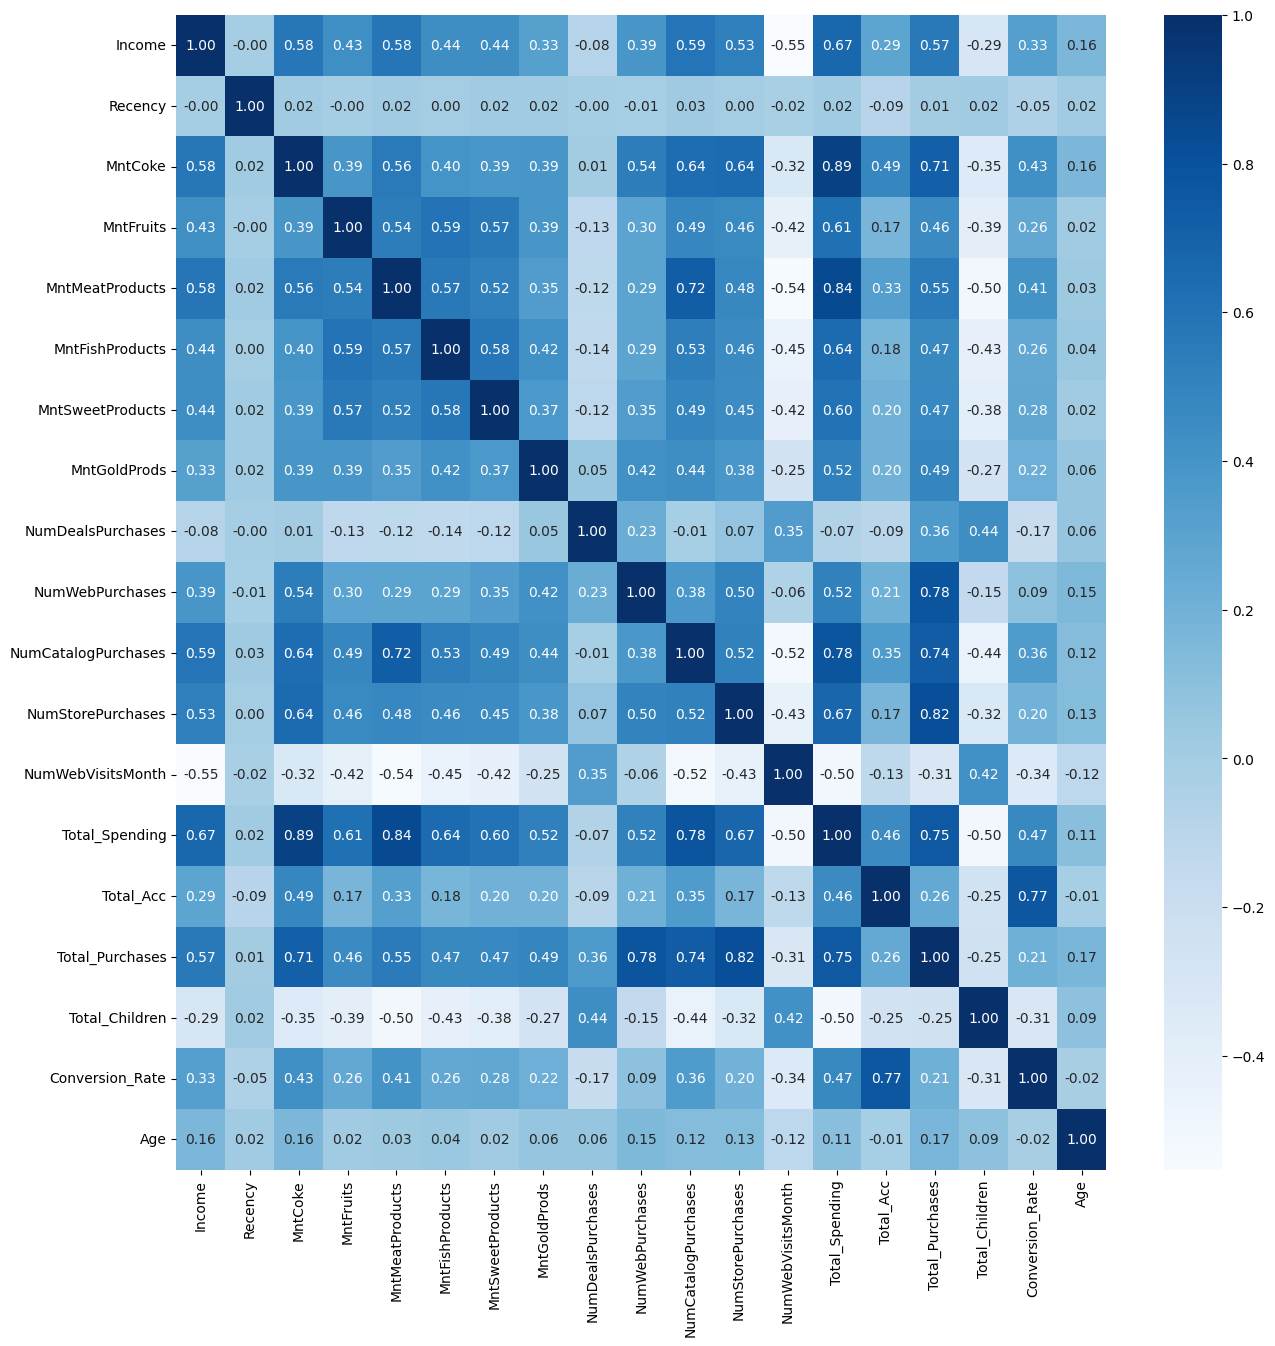

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_final[nums].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

**About the Correlation Matrix:**<br>
- **Strength of Correlations:**<br> The correlation values range from -1 to 1. The closer a correlation is to -1 or 1, the stronger the relationship between variables. Values close to 0 indicate a weaker relationship.

- **Positive and Negative Correlations:**<br> Positive correlations (values > 0) indicate that as one variable increases, the other tends to increase, and vice versa. Negative correlations (values < 0) indicate that as one variable increases, the other tends to decrease, and vice versa.

**Correlation Analysis:**
- **Strong Positive Correlations:**<br> Features like **Total_Spending** and **Total_Purchases** have strong positive correlations with various spending categories (**MntCoke**, **MntMeatProducts**, etc.), indicating that customers who spend more on these categories tend to spend more overall.
- **Negative Correlations:**<br> **NumWebVisitsMonth** has negative correlations with several features, suggesting that customers who visit the website more frequently tend to spend less on certain categories.
- **Income Correlations:**<br> **Income** is positively correlated with most spending categories and **Total_Spending**, indicating that customers with higher incomes tend to spend more.
- **Recency Correlations:**<br> **Recency** has weak correlations with most features, suggesting that it doesn't strongly correlate with other features in the dataset.

**Conversion Rate Correlations:**
- **Income (0.33):** There's a moderate positive correlation between Income and Conversion Rate, suggesting that customers with higher incomes tend to have a higher conversion rate.

- **Total_Spending (0.47):** Conversion Rate is positively correlated with Total_Spending, indicating that customers who spend more tend to have a higher conversion rate.

- **NumCatalogPurchases (0.36):** Conversion Rate has a moderate positive correlation with NumCatalogPurchases, implying that customers who make catalog purchases are more likely to have a higher conversion rate.

- **Age (-0.02):** Interestingly, Age has little to no correlation with Conversion Rate, suggesting that even if there is a relationship it is either non-existent or non-linear in nature.

- **Recency (-0.05):** Like Age, Recency also has a very weak correlation with Conversion Rate.

- **Total_Purchases (0.21):** Conversion Rate has a moderate positive correlation with Total_Purchases, indicating that customers with a higher total number of purchases tend to have a higher conversion rate.

### Total Purchases vs. Income

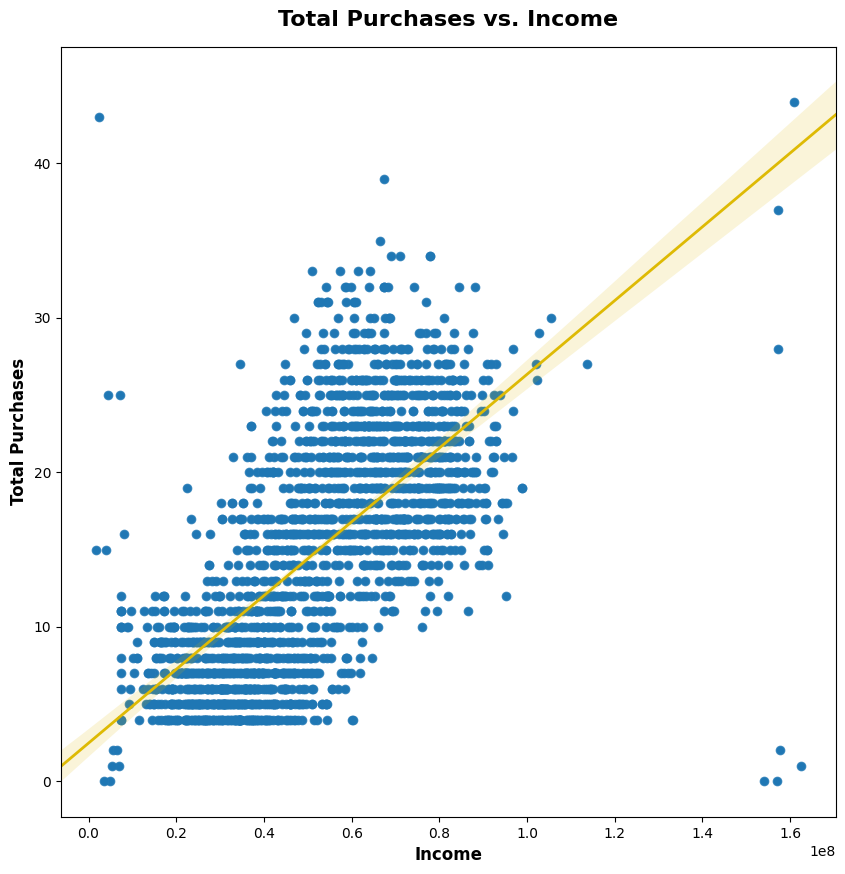

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Income', y = 'Total_Purchases', data = df_final[df_final['Income']<200000000])
sns.regplot(data=df_final[df_final['Income']<200000000], x="Income", y="Total_Purchases", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
plt.ylabel('Total Purchases', fontsize=12, fontweight = 'bold')
plt.xlabel('Income', fontsize=12, fontweight = 'bold')
plt.title('Total Purchases vs. Income', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

**Analysis:**<br>
As can be seen above, Total Purchases has a positive correlation with Income.

### Total Spending vs. Total Purchases

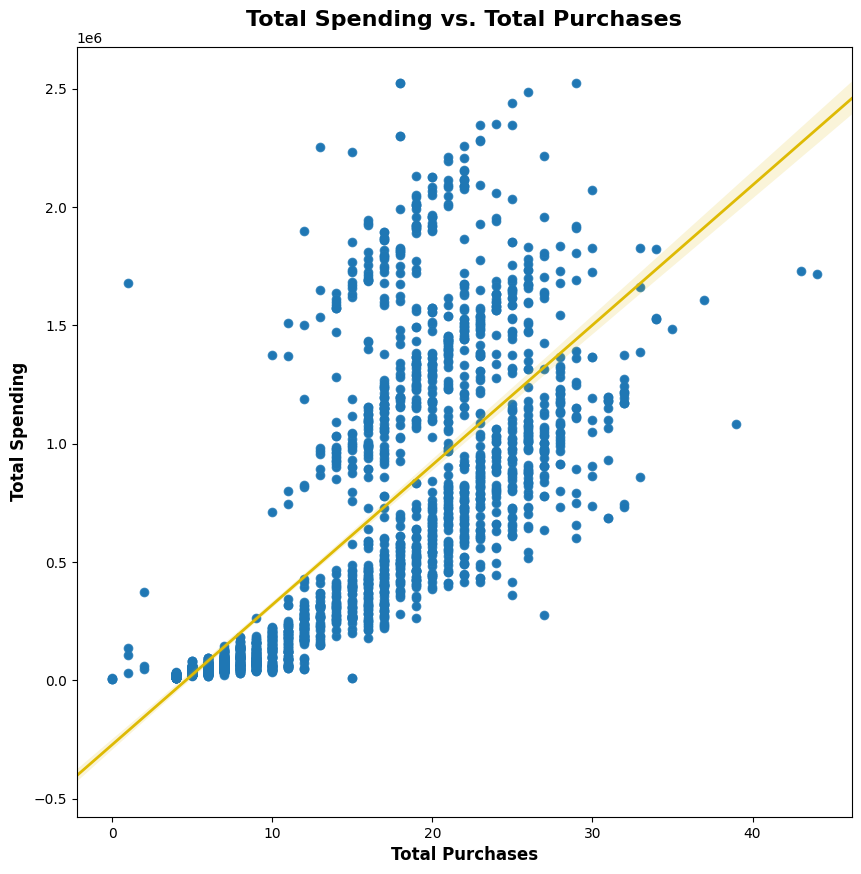

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Total_Purchases', y = 'Total_Spending', data = df_final)
sns.regplot(data=df_final, x="Total_Purchases", y="Total_Spending", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
plt.ylabel('Total Spending', fontsize=12, fontweight = 'bold')
plt.xlabel('Total Purchases', fontsize=12, fontweight = 'bold')
plt.title('Total Spending vs. Total Purchases', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

**Analysis:**<br>
As can be seen above, Total Spending has a positive correlation with Total Purchases.

### Total Spending vs. Income

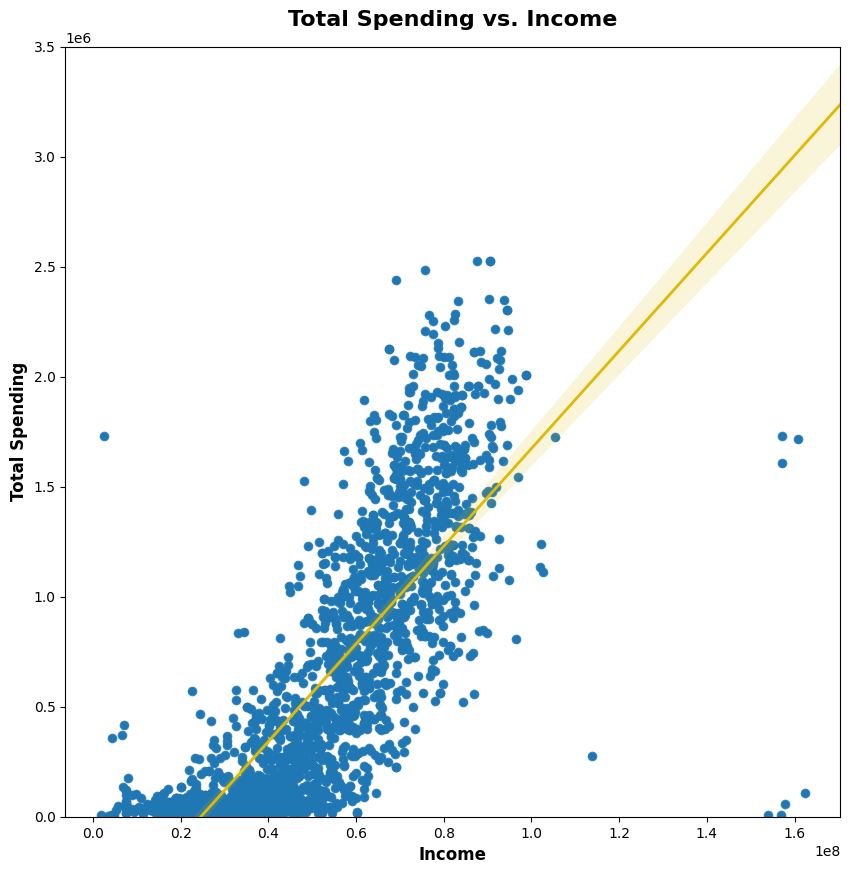

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Income', y = 'Total_Spending', data = df_final[df_final['Income']<200000000])
sns.regplot(data=df_final[df_final['Income']<200000000], x="Income", y="Total_Spending", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
plt.ylabel('Total Spending', fontsize=12, fontweight = 'bold')
plt.xlabel('Income', fontsize=12, fontweight = 'bold')
plt.title('Total Spending vs. Income', fontsize=16, fontweight = 'bold', pad = 15)
plt.ylim(0, 3500000)
plt.show()

**Analysis:**<br>
As can be seen above, Total Spending has a positive correlation with Income.

### **Everything vs. Conversion Rate**

### Total Purchases

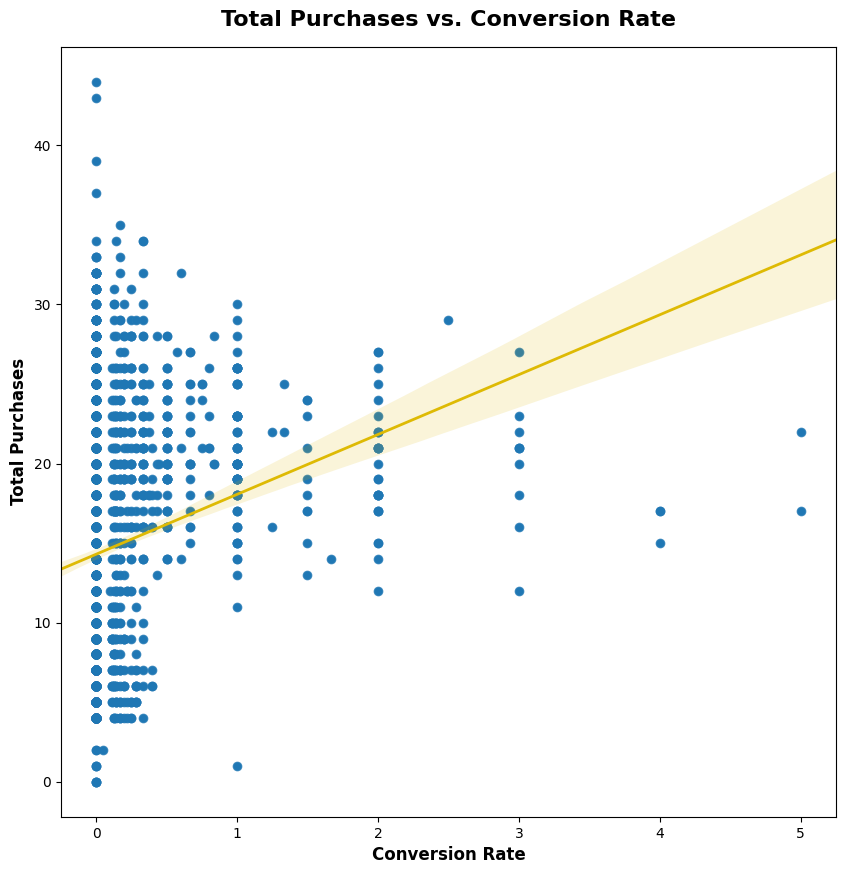

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Conversion_Rate', y = 'Total_Purchases', data = df_final)
sns.regplot(data=df_final, x="Conversion_Rate", y="Total_Purchases", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
plt.ylabel('Total Purchases', fontsize=12, fontweight = 'bold')
plt.xlabel('Conversion Rate', fontsize=12, fontweight = 'bold')
plt.title('Total Purchases vs. Conversion Rate', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

**Analysis:**<br>
As can be seen above, Total Purchases has a positive correlation with Conversion Rate

### Total Spending

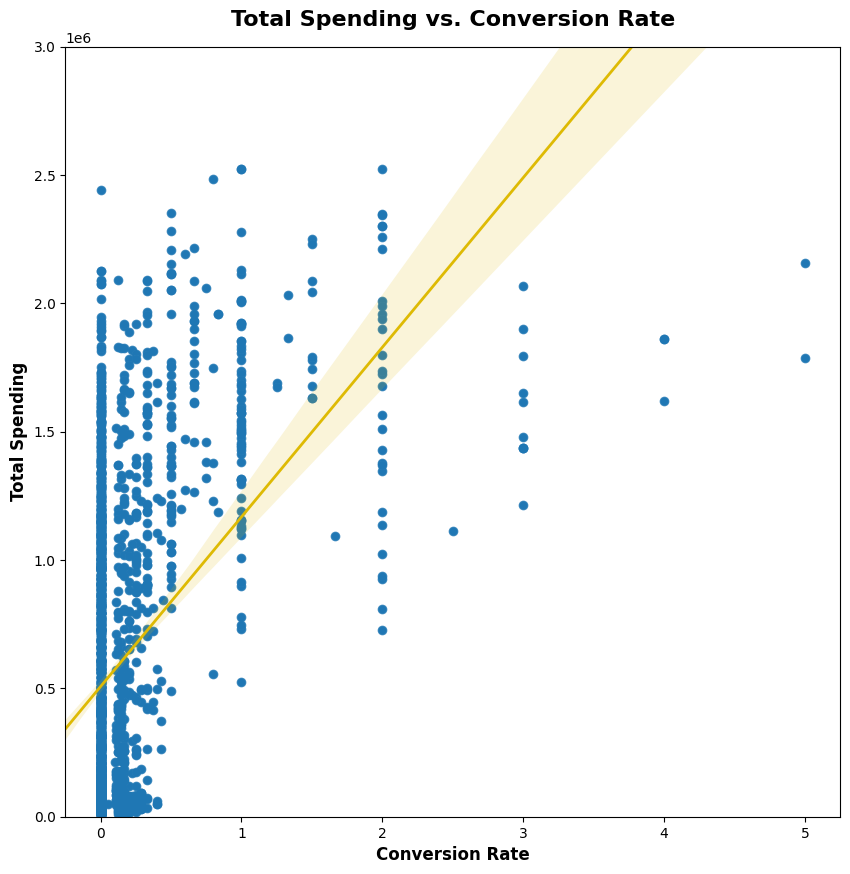

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Conversion_Rate', y = 'Total_Spending', data = df_final)
sns.regplot(data=df_final, x="Conversion_Rate", y="Total_Spending", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
plt.ylabel('Total Spending', fontsize=12, fontweight = 'bold')
plt.xlabel('Conversion Rate', fontsize=12, fontweight = 'bold')
plt.title('Total Spending vs. Conversion Rate', fontsize=16, fontweight = 'bold', pad = 15)
plt.ylim(0, 3000000)
plt.show()

**Analysis:**<br>
As can be seen above, Total Spending has a positive correlation with Conversion Rate

### Income

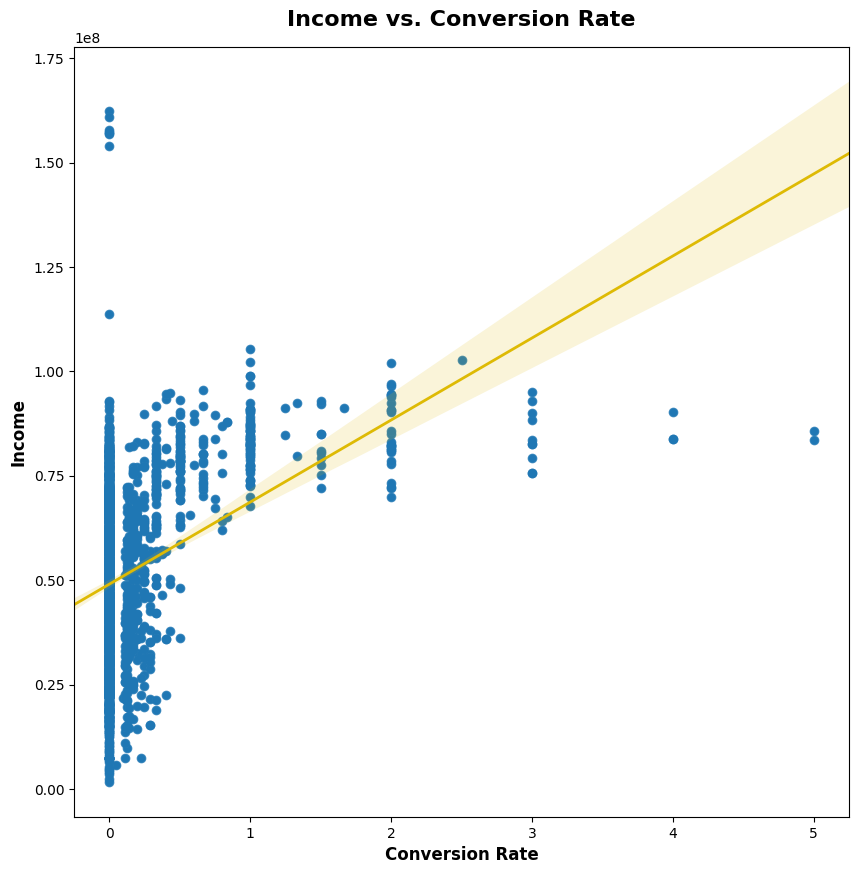

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Conversion_Rate', y = 'Income', data = df_final[df_final['Income']<200000000])
sns.regplot(data=df_final[df_final['Income']<200000000], x="Conversion_Rate", y="Income", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
plt.ylabel('Income', fontsize=12, fontweight = 'bold')
plt.xlabel('Conversion Rate', fontsize=12, fontweight = 'bold')
plt.title('Income vs. Conversion Rate', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

**Analysis:**<br>
As can be seen above, Income has a positive correlation with Conversion Rate.

### Age

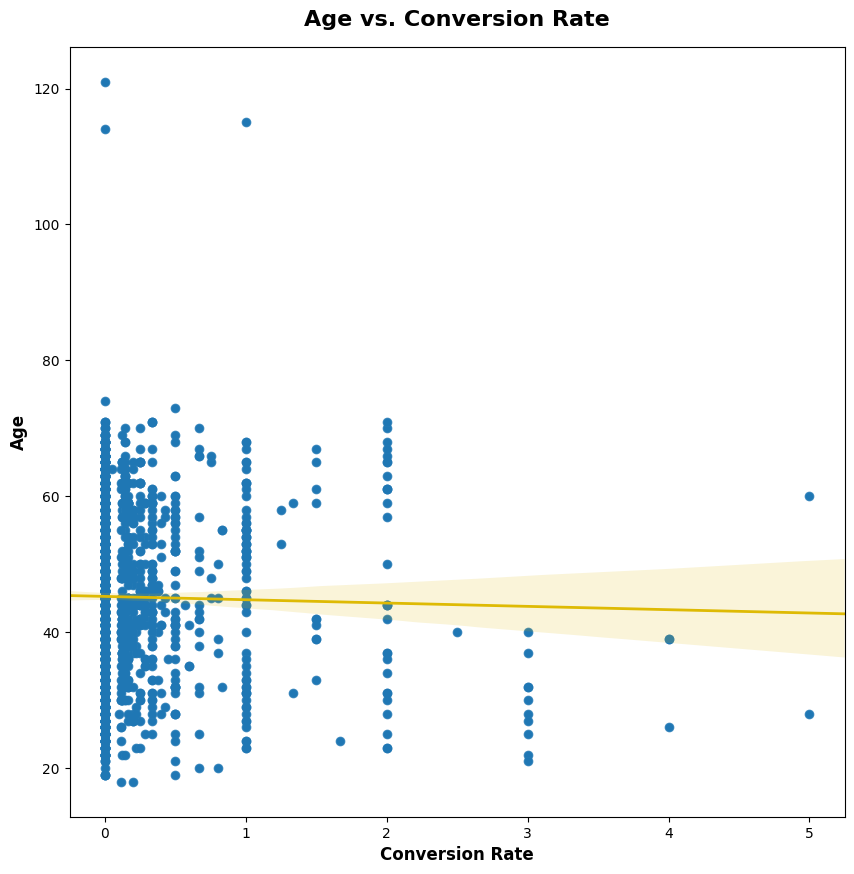

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Conversion_Rate', y = 'Age', data = df_final)
sns.regplot(data=df_final, x="Conversion_Rate", y="Age", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
plt.ylabel('Age', fontsize=12, fontweight = 'bold')
plt.xlabel('Conversion Rate', fontsize=12, fontweight = 'bold')
plt.title('Age vs. Conversion Rate', fontsize=16, fontweight = 'bold', pad = 15)
plt.show()

**Analysis:**<br>
As can be seen from the previous correlation heatmap and the above scatterplot, Age has little to no correlation with Conversion Rate. From the correlation matrix it can be seen that the correlation between Age and Conversion Rate is only 0.02, and the above scatterplot shows a near tangential trend line, indicating that there is little to no relationship between the two.

## **Insights and Recommendations:**

### **Insights**

- Total Spending is decently positively correlated with Conversion Rate (0.47). This indicates that customers who spend more in total are more likely to convert.

- Income is also positively correlated with Conversion Rate (0.33). Higher-income customers may be more likely to convert.

- Recency has little to no relationship with the Conversion Rate.

- The Age of the customers also has little to no relationship with the Conversion Rate.

- Web Purchases, Catalog Purchases, and Store Purchases show high positive correlations with the Conversion Rate. Customers who make purchases through these channels are some what more likely to convert than other channels.

- Various product categories, such as Coke, Meat Products, and Sweet Products, show decent positive correlations with the Conversion Rate. These products are more popular with the customers than others.

- The number of children is negatively correlated with the Conversion Rate (-0.31). Customers with more children are less likely to convert.

- The number of children on the other hand, is decently positively correlated with Deals (discounts) Purchases (0.44). Customers with more children are more likely to purchase products at a discount.

### **Recommendations**
- Focus marketing efforts on high spenders or encouraging higher spending.

- Target high income demographic with tailored campaigns, as it could be beneficial.

- Focus on Web Purchases, Catalog Purchases, and Store Purchases in marketing efforts in general.

- Emphasize Coke, Meat Products, and Sweet Products in marketing campaigns in general.

- Consider tailoring marketing strategies to different family sizes, especially when armed with the fact that customers with more children are more likely to purchase products at a discount. Marketing strategies could be focused on discounts or discounted products when targeting high family sizes.

# **Data Preprocessing**

## Dropping redundant columns

In [ ]:
# Removing "Unnamed: 0" column, as it is redundant
df.drop(columns = 'Unnamed: 0', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntCoke              2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## Checking for duplicates

In [ ]:
# Checking duplicates
df.duplicated().sum()

0

## Handling null values

In [ ]:
# Checking null values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Total_Spending          0
Total_Acc               0
Total_Purchases         0
Total_Children          0
Conversion_Rate         0
Age                     0
Age_Group               0
Has_Partner             0
dtype: int64

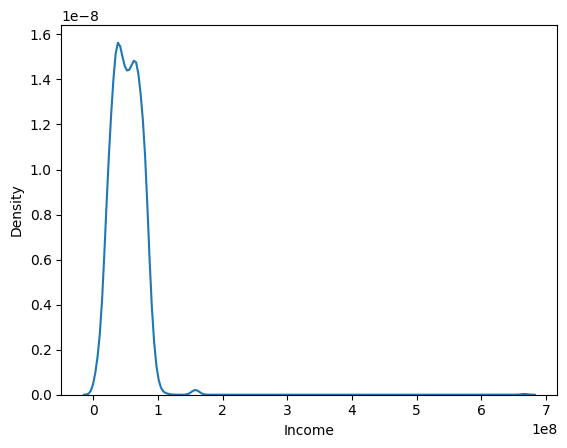

In [ ]:
# Checking distribution of income to determine imputation strategy
sns.kdeplot(df['Income'])
plt.show()

**As can be seen on the chart above, income distribution is right skewed, therefore null values will be imputed with the median.**

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].median())
df.isna().sum().sum()

0

## Handling anomalous values

In [ ]:
df['Age'].value_counts().sort_index().tail()

73     1
74     1
114    1
115    1
121    1
Name: Age, dtype: int64

**Some age values as can be seen above are anomalous and unrealistic, therefore should be removed if possible.**

In [ ]:
df = df[df['Age'] < 100]
df['Age'].value_counts().sort_index().tail()

69    8
70    7
71    7
73    1
74    1
Name: Age, dtype: int64

## Handling outliers

**Outliers will be manually trimmed by looking at each feature's boxplot**

Outliers in the following numerical features will be removed:
- MntMeatProducts
- Income
- NumWebPurchases
- MntSweetProducts
- NumCatalogPurchases
- Total_Spending



In [ ]:
print(f'Number of rows before outlier trimming: {df.shape[0]}')
df_clean = df[(df['MntMeatProducts']<=1250000)&(df['Income']<=100000000)&(df['NumWebPurchases']<=20)&(df['MntSweetProducts']<=250000)&(df['NumCatalogPurchases']<=20)&(df['Total_Spending']<=2500000)]
print(f'Number of rows after outlier trimming: {df_clean.shape[0]}')

Number of rows before outlier trimming: 2237
Number of rows after outlier trimming: 2216


## Dropping unnecessary features

**The following features are dropped:**
- Marital_Status
- Dt_Customer
- Year_Birth
- Kidhome
- Teenhome
- AcceptedCmp1
- AcceptedCmp2
- AcceptedCmp3
- AcceptedCmp4
- AcceptedCmp5
- Response

In [ ]:
df_clean = df_clean.drop(columns=['Marital_Status', 'Dt_Customer', 'Year_Birth', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'])

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2216 non-null   int64   
 1   Education            2216 non-null   object  
 2   Income               2216 non-null   float64 
 3   Recency              2216 non-null   int64   
 4   MntCoke              2216 non-null   int64   
 5   MntFruits            2216 non-null   int64   
 6   MntMeatProducts      2216 non-null   int64   
 7   MntFishProducts      2216 non-null   int64   
 8   MntSweetProducts     2216 non-null   int64   
 9   MntGoldProds         2216 non-null   int64   
 10  NumDealsPurchases    2216 non-null   int64   
 11  NumWebPurchases      2216 non-null   int64   
 12  NumCatalogPurchases  2216 non-null   int64   
 13  NumStorePurchases    2216 non-null   int64   
 14  NumWebVisitsMonth    2216 non-null   int64   
 15  Complain             

## Feature Encoding

In [ ]:
# Encoding categorical features

df_encoded = df_clean.copy()

df_encoded['Education'] = np.where(df_encoded['Education'] == 'SMA', 0, np.where(df_encoded['Education'] == 'D3', 1, np.where(df_encoded['Education'] == 'S1', 2, np.where(df_encoded['Education'] == 'S2', 3, 4))))
df_encoded['Has_Partner'] = np.where(df_encoded['Has_Partner']=='Yes', 1, 0)
df_encoded['Complain'] = df_encoded['Complain'].astype(int)
df_encoded['Age_Group'] = np.where(df_encoded['Age_Group'] == 'Young Adult', 0, np.where(df_encoded['Age_Group'] == 'Adult', 1, np.where(df_encoded['Age_Group'] == 'Middle Age', 2, np.where(df_encoded['Age_Group'] == 'Late Middle Age', 3, 4))))
df_encoded[['Education', 'Has_Partner', 'Complain', 'Age_Group']]

,Education,Has_Partner,Complain,Age_Group
0,2,0,0,3
1,2,0,0,3
2,2,1,0,2
3,2,1,0,0
4,4,1,0,0
...,...,...,...,...
2235,2,1,0,2
2236,4,1,0,4
2237,2,0,0,0
2238,3,1,0,3


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
df_scaled = df_encoded.copy()
scaler = StandardScaler()
df_scaled[nums] = scaler.fit_transform(df_scaled[nums])
df_scaled[nums].describe()

,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Spending,Total_Acc,Total_Purchases,Total_Children,Conversion_Rate,Age
count,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03
mean,1.619242e-16,1.050103e-16,-1.763531e-17,-3.206420e-18,4.969951e-17,-2.805618e-17,4.809630e-18,3.687383e-17,-1.282568e-16,3.046099e-17,4.809630e-17,1.342688e-17,1.218440e-16,1.603210e-17,2.084173e-17,-1.098199e-16,-3.527062e-17,1.603210e-17,-1.955916e-16
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00
min,-2.442990e+00,-1.698762e+00,-9.067315e-01,-6.632075e-01,-7.645701e-01,-6.872105e-01,-6.614060e-01,-8.555349e-01,-1.239837e+00,-1.548404e+00,-9.574084e-01,-1.802916e+00,-2.229250e+00,-9.989128e-01,-5.022416e-01,-1.956011e+00,-1.271688e+00,-3.457541e-01,-2.323670e+00
25%,-7.901975e-01,-8.695787e-01,-8.351249e-01,-6.188029e-01,-6.896020e-01,-6.323274e-01,-6.366187e-01,-6.787588e-01,-7.065532e-01,-7.855618e-01,-9.574084e-01,-8.719814e-01,-5.644026e-01,-8.920702e-01,-5.022416e-01,-8.993907e-01,-1.271688e+00,-3.457541e-01,-6.979505e-01
50%,-6.349326e-03,2.870272e-02,-3.801246e-01,-4.602147e-01,-4.506414e-01,-4.676783e-01,-4.631072e-01,-3.841318e-01,-1.732692e-01,-2.272002e-02,-2.251851e-01,-2.513580e-01,2.680208e-01,-3.452876e-01,-5.022416e-01,2.515195e-02,5.946961e-02,-3.457541e-01,-9.900117e-02
75%,8.041711e-01,8.578856e-01,5.970071e-01,1.741378e-01,3.130956e-01,2.275071e-01,1.565764e-01,2.444056e-01,3.600149e-01,7.401217e-01,5.070382e-01,6.795769e-01,6.842325e-01,7.273283e-01,6.380938e-01,8.176171e-01,5.946961e-02,-4.908525e-02,8.422049e-01
max,2.319578e+00,1.721618e+00,3.547796e+00,4.386238e+00,3.845965e+00,4.051027e+00,4.246488e+00,4.290615e+00,6.759423e+00,2.647226e+00,3.069820e+00,2.231135e+00,6.094985e+00,3.159150e+00,5.199435e+00,3.195013e+00,2.721786e+00,1.152100e+01,2.467925e+00


# **Modeling**

**To segementize the customers the following metircs will be used:**
- Purchasing Power: **Income**
- Monetary Value: **Total_Spending**
- Frequency: Total_Purchases
- Activity: NumWebVisitsMonth
- Loyalty: Total_Acc

In [ ]:
df_cluster = df_scaled[['Income', 'Total_Spending', 'NumWebVisitsMonth','Total_Purchases', 'Total_Acc']]

## Elbow method

In [ ]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=123, n_init = 'auto', max_iter = 10000)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)

(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    47.800967
1    23.093026
2    17.275354
3    13.301528
4     9.105829
5     7.728815
6     8.106468
7     2.706393
8     9.260073
9          NaN
dtype: float64

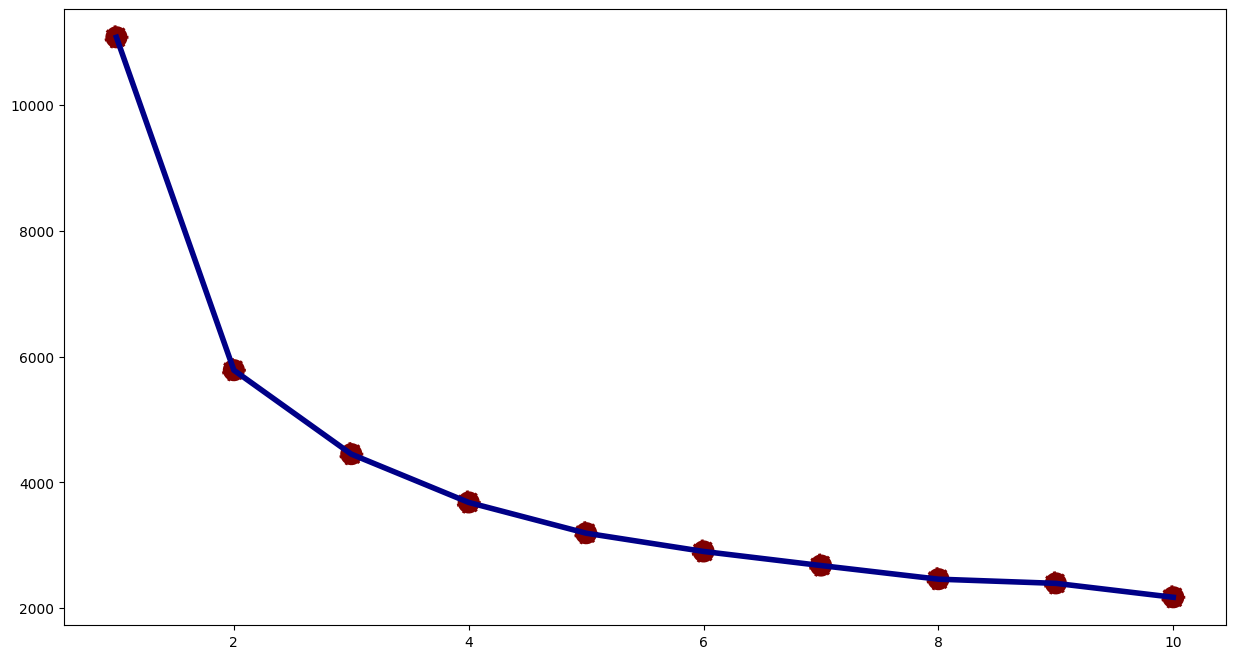

In [ ]:
# Visualizing the Inertia
plt.figure(figsize=(15, 8))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

## Silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


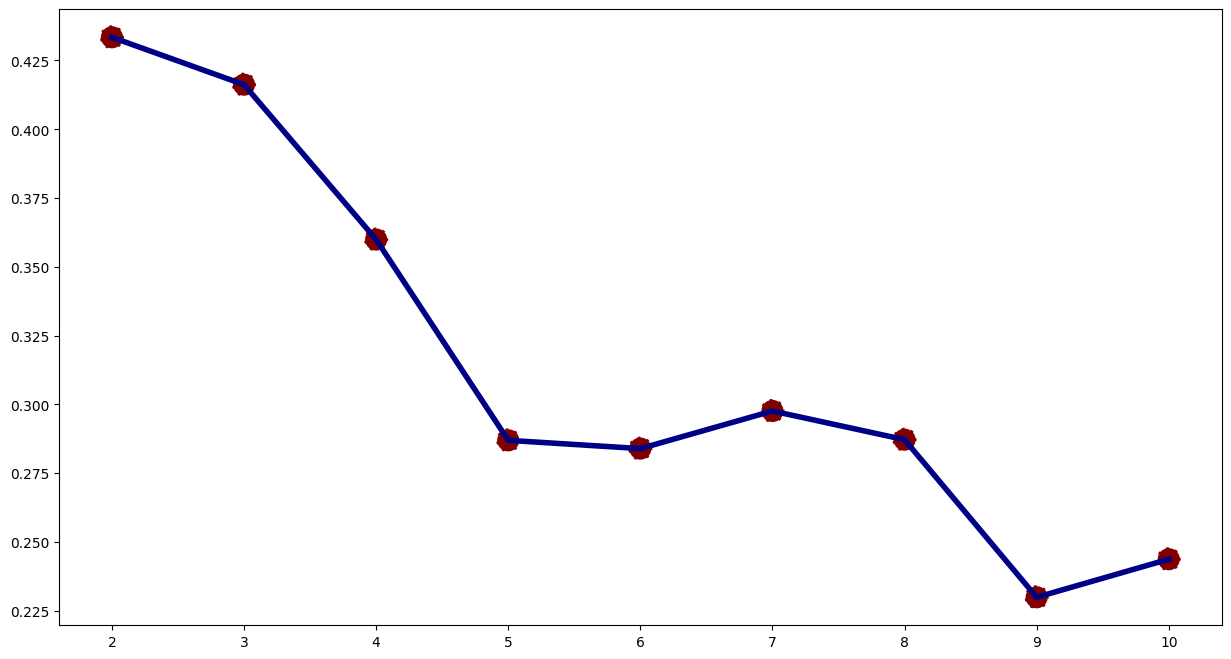

In [ ]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=123, n_init = 'auto').fit(df_cluster)
    preds = kmeans.predict(df_cluster)

    score_euclidean = silhouette_score(df_cluster, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

**From the analysis of both the elbow method and the silhouette score, it is decided to divide the customers into 3 clusters.**

## K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=3, init='k-means++', random_state=123, n_init = 'auto', max_iter=10000)
kmeans1.fit(df_cluster.values)

# Adding clusters to the unscaled data frame
df_clean['Cluster'] = kmeans1.labels_

df_clean.sample(3)

,ID,Education,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Total_Spending,Total_Acc,Total_Purchases,Total_Children,Conversion_Rate,Age,Age_Group,Has_Partner,Cluster
65,8082,S1,25721000.0,75,1000,3000,6000,3000,6000,15000,1,1,1,2,7,0,3,11,34000,1,5,1,0.142857,43,Adult,Yes,2
1217,8876,S3,33629000.0,49,132000,0,16000,0,0,4000,5,3,1,4,9,0,3,11,152000,0,13,2,0.000000,51,Middle Age,Yes,2
176,10314,S3,83837000.0,79,847000,66000,119000,86000,89000,111000,1,9,10,5,4,0,3,11,1318000,3,25,0,0.750000,66,Senior,Yes,1


## PCA to visualize the clusters

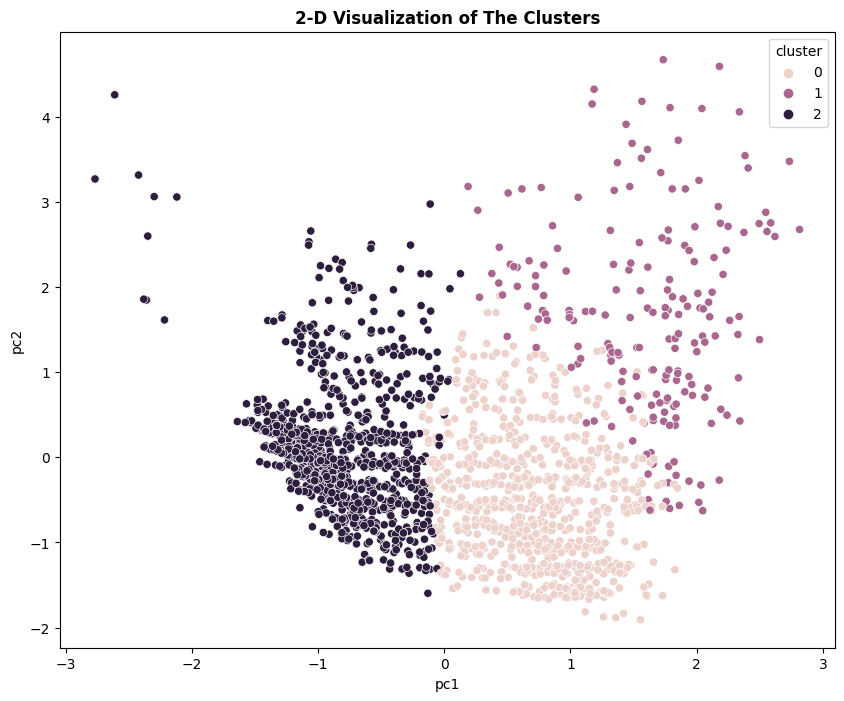

In [ ]:
from sklearn.decomposition import PCA

# Implementing PCA
pca = PCA(n_components = 2, svd_solver='full', whiten=True)
pca.fit(df_cluster)
Xpca = pca.transform(df_cluster)

pdf = pd.DataFrame(Xpca, columns=['pc1', 'pc2'])

pdf['cluster'] = kmeans1.labels_

# Plotting clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pc1', y='pc2', data = pdf, hue='cluster')
plt.title('2-D Visualization of The Clusters', fontweight = 'bold')
plt.show()

# **Interpretation and Analysis**

## Cluster share of customers

In [ ]:
df_share = pdf['cluster'].value_counts().reset_index()
df_share.columns = ['Cluster', 'Customers']
df_share['Percentage'] = round(df_share['Customers']/df_share['Customers'].sum(), 2)*100
df_share

,Cluster,Customers,Percentage
0,2,1153,52.0
1,0,851,38.0
2,1,212,10.0


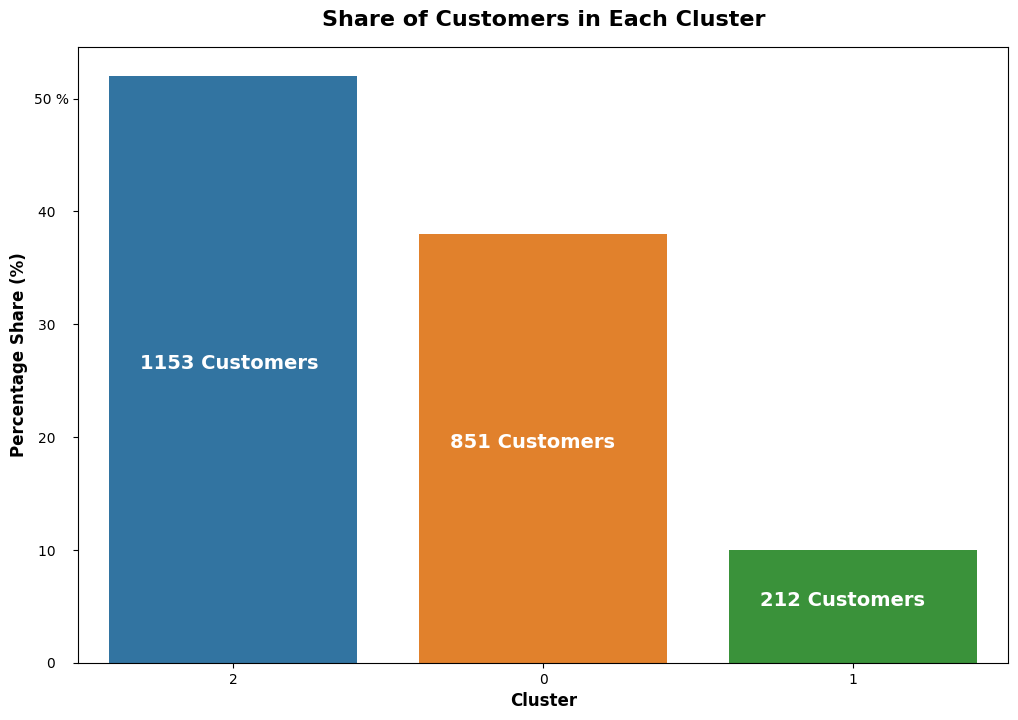

In [ ]:
# Plotting cluster share
order = df_share['Cluster'].value_counts().index
a = np.arange(len(df_share['Cluster']))
b = df_share['Percentage']
c = df_share['Customers']

plt.figure(figsize=(12,8))
bar = sns.barplot(x = 'Cluster', y = 'Percentage', order=order, data=df_share)
plt.title('Share of Customers in Each Cluster', fontsize=16, fontweight = 'bold', pad = 15)
plt.xlabel('Cluster', fontsize=12, fontweight = 'bold')
plt.ylabel('Percentage Share (%)', fontsize=12, fontweight = 'bold')

for i in range(len(a)):
  plt.text(x = i-0.3, y = b[i]*0.5, s = str(c[i])+' Customers', color='white', fontweight='bold', fontsize=14)

bar.set_yticks(range(0, 60, 10))
bar.set_yticklabels(labels = ['0   ', '10   ', '20   ', '30   ', '40   ', '50 %'])
plt.show()

**The quantity of customers is not evenly distributed among the clusters.**

## Descriptive statistics of each cluster based on selected features

In [ ]:
df_stat = df_clean.groupby('Cluster')[nums].agg(['mean', 'median', 'std']).round(2)
df_stat

Income                          Recency                \
                mean      median          std    mean median    std   
Cluster                                                               
0        66819337.25  66636000.0  10197434.58   50.30   52.0  28.51   
1        77079172.17  79703500.0  12591720.67   45.97   42.5  30.12   
2        35510902.43  35924000.0  11971495.74   48.93   49.0  29.03   

           MntCoke                      MntFruits                     \
              mean    median        std      mean   median       std   
Cluster                                                                
0        498401.88  457000.0  257751.72  46988.25  32000.0  45762.48   
1        846452.83  896500.0  324975.99  52316.04  32500.0  50373.38   
2         60593.24   26000.0   79746.94   5934.08   3000.0  11041.63   

        MntMeatProducts                      MntFishProducts           \
                   mean    median        std            mean   median   
Cluster                                                                 
0             276454.76  217000.0  205544.53        66478.26  46000.0   
1             438820.75  423500.0  274942.76        77000.00  52000.0   
2              28888.99   16000.0   33034.89         8972.25   4000.0   

                  MntSweetProducts                    MntGoldProds           \
              std             mean   median       std         mean   median   
Cluster                                                                       
0        62433.70         47520.56  32000.0  47064.32     68876.62  50000.0   
1        68598.70         56443.40  40000.0  50814.05     72287.74  48000.0   
2        16957.39          5831.74   3000.0  10228.35     19586.30  11000.0   

                  NumDealsPurchases              NumWebPurchases               \
              std              mean median   std            mean median   std   
Cluster                                                                         
0        57043.60              2.61    2.0  2.24            5.71    5.0  2.38   
1        58932.83              1.60    1.0  1.65            5.79    5.0  2.30   
2        27356.72              2.25    2.0  1.55            2.52    2.0  1.77   

        NumCatalogPurchases              NumStorePurchases               \
                       mean median   std              mean median   std   
Cluster                                                                   
0                      4.47    4.0  2.42              8.51    8.0  2.72   
1                      5.79    6.0  2.46              7.83    8.0  2.52   
2                      0.66    0.0  0.84              3.45    3.0  1.27   

        NumWebVisitsMonth              Total_Spending                        \
                     mean median   std           mean     median        std   
Cluster                                                                       
0                    4.12    4.0  2.20     1004720.33   981000.0  404757.41   
1                    3.77    3.0  2.30     1543320.75  1615500.0  472807.70   
2                    6.56    7.0  1.88      129806.59    71000.0  130323.21   

        Total_Acc              Total_Purchases              Total_Children  \
             mean median   std            mean median   std           mean   
Cluster                                                                      
0            0.25    0.0  0.44           21.30   21.0  4.67           0.75   
1            2.57    2.0  1.01           21.01   21.0  4.15           0.32   
2            0.19    0.0  0.47            8.88    8.0  4.19           1.23   

                     Conversion_Rate                 Age                
        median   std            mean median   std   mean median    std  
Cluster                                                                 
0          1.0  0.70            0.08   0.00  0.20  47.78   48.0  11.38  
1          0.0  0.58            1.04   0.75  0.88  45.34   44.0  1

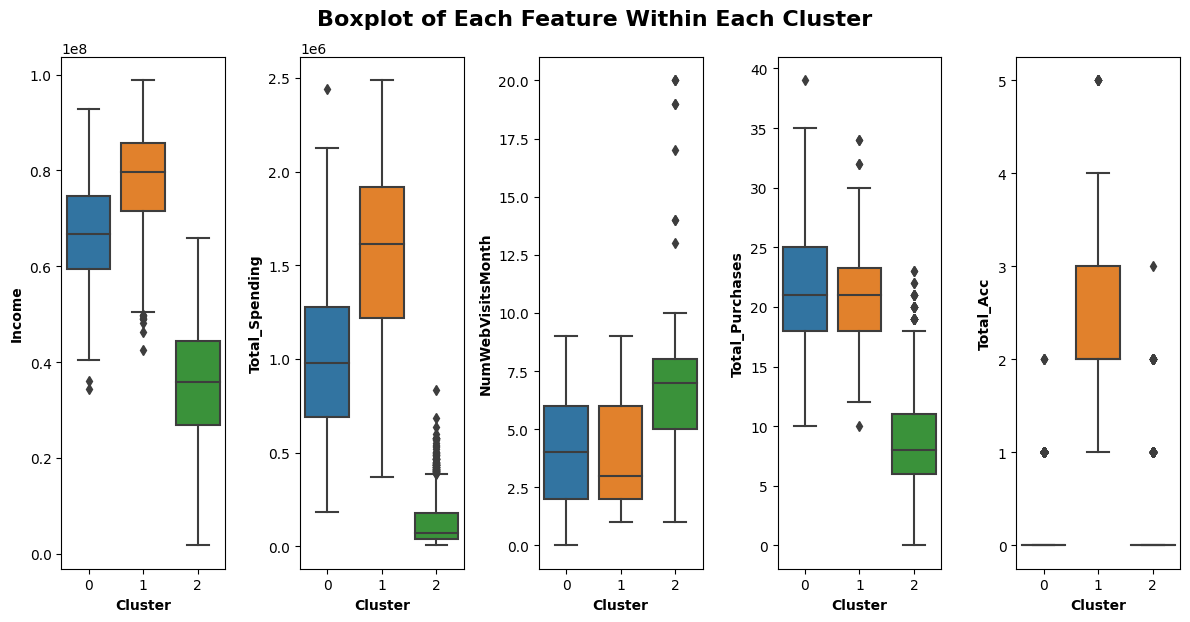

In [ ]:
features = ['Income', 'Total_Spending', 'NumWebVisitsMonth','Total_Purchases', 'Total_Acc']

fig, axes = plt.subplots(1, 5, figsize=(12,6))

for index, ax in enumerate(axes):
    bar = sns.boxplot(x = df_clean['Cluster'], y = df_clean[features[index]], ax=ax)
    bar.set_xlabel('Cluster', fontsize=10, fontweight = 'bold')
    bar.set_ylabel(features[index], fontsize=10, fontweight = 'bold')
    plt.tight_layout()

plt.suptitle('Boxplot of Each Feature Within Each Cluster', fontsize=16, fontweight = 'bold', y=1.03)
plt.show()

From the descriptive statistics and the chart above, it is concluded that the customer characteristics of each cluster are as follows:

- **Cluster 0:** High value customers, relatively high income, frequent purchases, but less active in terms of visits.
- **Cluster 1:** High potential customers, high income, high spending, loyal in terms of campaign acceptance, but less frequent purchases and less active as well.
- **Cluster 2:** Low value customers, lower income, infrequent purchases, but active in terms of visits.

## Age group distribution in each cluster

In [ ]:
df_age = df_clean.groupby(['Cluster','Age_Group'])['ID'].count().reset_index().rename(columns={'ID':'cust'})
df_cluster_total = df_age.groupby('Cluster')['cust'].sum().rename('cluster_total')
df_age = df_age.merge(df_cluster_total, on = 'Cluster')
df_age['percentage'] = round(df_age['cust']/df_age['cluster_total']*100, 2)
df_age

,Cluster,Age_Group,cust,cluster_total,percentage
0,0,Adult,252,851,29.61
1,0,Late Middle Age,218,851,25.62
2,0,Middle Age,223,851,26.20
3,0,Senior,37,851,4.35
4,0,Young Adult,121,851,14.22
5,1,Adult,58,212,27.36
6,1,Late Middle Age,39,212,18.40
7,1,Middle Age,37,212,17.45
8,1,Senior,19,212,8.96
9,1,Young Adult,59,212,27.83


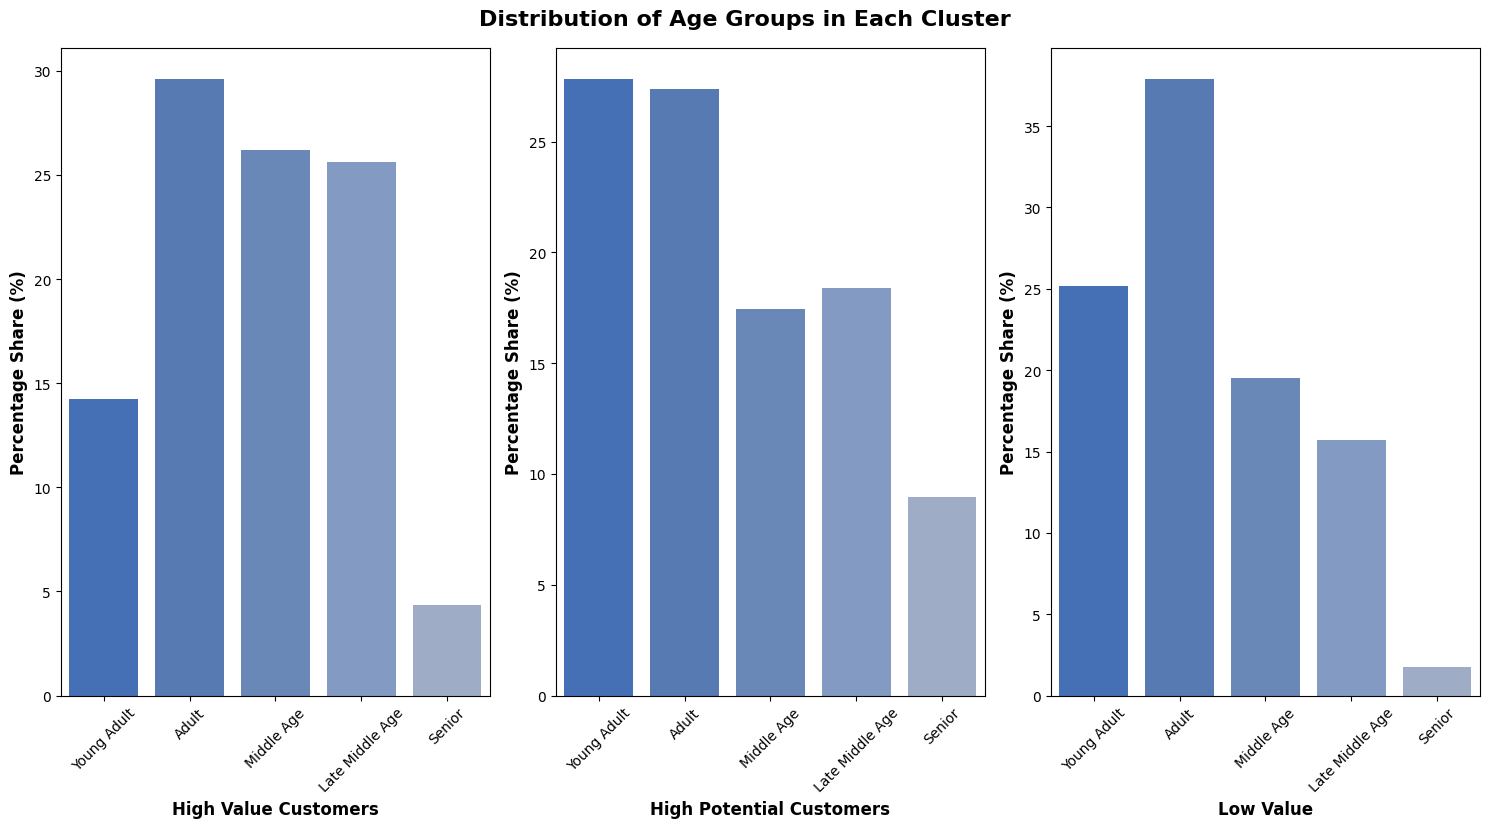

In [ ]:
plt.figure(figsize=(15,8))
labels = ['High Value Customers', 'High Potential Customers', 'Low Value']
order = ['Young Adult', 'Adult', 'Middle Age', 'Late Middle Age', 'Senior']
for i in range(3):
  plt.subplot(1, 3, i+1)
  bar = sns.barplot(x = 'Age_Group', y = 'percentage', data = df_age[df_age['Cluster']==i], palette = ['#326cc9', '#4877c2', '#5c84c4', '#7898cc', '#97abcc'], order =order)
  plt.xticks(rotation=45)
  plt.xlabel(labels[i], fontsize=12, fontweight = 'bold')
  plt.ylabel('Percentage Share (%)', fontsize=12, fontweight = 'bold')
  plt.tight_layout()
plt.suptitle('Distribution of Age Groups in Each Cluster', fontsize=16, fontweight = 'bold', y=1.03)
plt.show()

**Description:**
- **High value** cluster consists of mostly older customers with adult and middle aged customers dominating.
- The number of adults and young adults are almost equal in the **High potential** cluster with both of them dominating.
- **Low value** cluster consists of mostly adults with young adults in 2nd place.

In [ ]:
df_clean['Cluster'] = np.where(df_clean['Cluster'] == 0, 'High Value', np.where(df_clean['Cluster'] == 1, 'High Potential', 'Low Value'))

## Total Purchases vs. Income by cluster

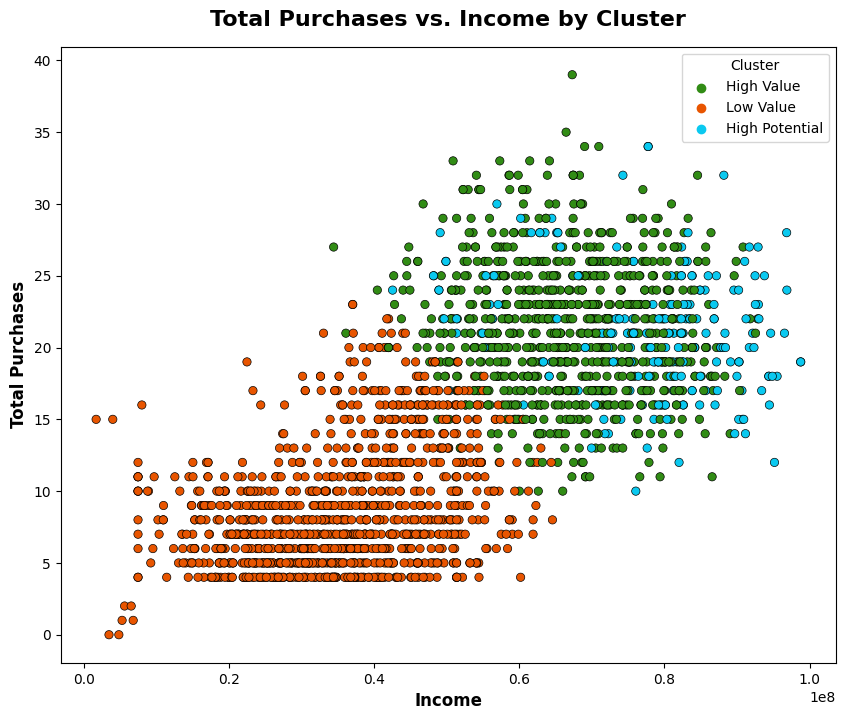

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Income', y = 'Total_Purchases', data = df_clean, hue = 'Cluster', palette = ['#318c15', '#e85500', '#0ac9f0'], edgecolor = 'black')
plt.ylabel('Total Purchases', fontsize=12, fontweight = 'bold')
plt.xlabel('Income', fontsize=12, fontweight = 'bold')
plt.title('Total Purchases vs. Income by Cluster', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

**Analysis:**

As can be seen above low value customers make less and buy less, while high value and high potential customers make more and buy more, with high potential customers making slightly more money on average.

## Total Purchases vs. Total Spending by cluster

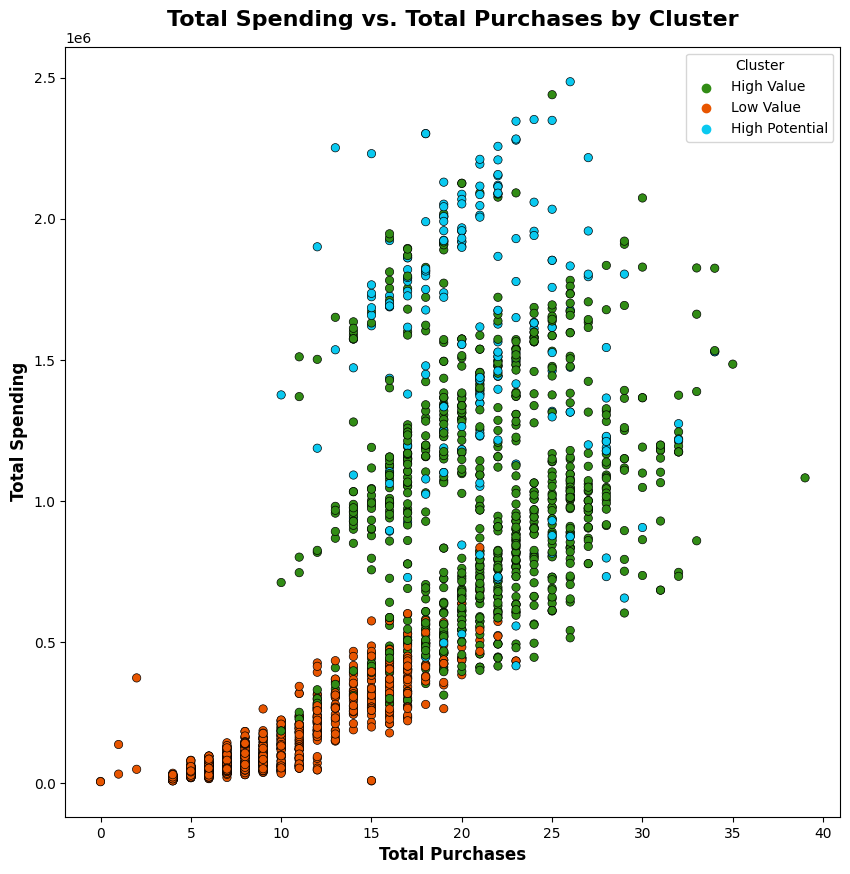

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Total_Purchases', y = 'Total_Spending', data = df_clean, hue = 'Cluster', palette = ['#318c15', '#e85500', '#0ac9f0'], edgecolor = 'black')
plt.ylabel('Total Spending', fontsize=12, fontweight = 'bold')
plt.xlabel('Total Purchases', fontsize=12, fontweight = 'bold')
plt.title('Total Spending vs. Total Purchases by Cluster', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

**Analysis:**

High potential customers purchase about the same number of times as high value customers, but the former spend considerably more on their purchases on average.

## Total Purchases vs. Conversion Rate by cluster

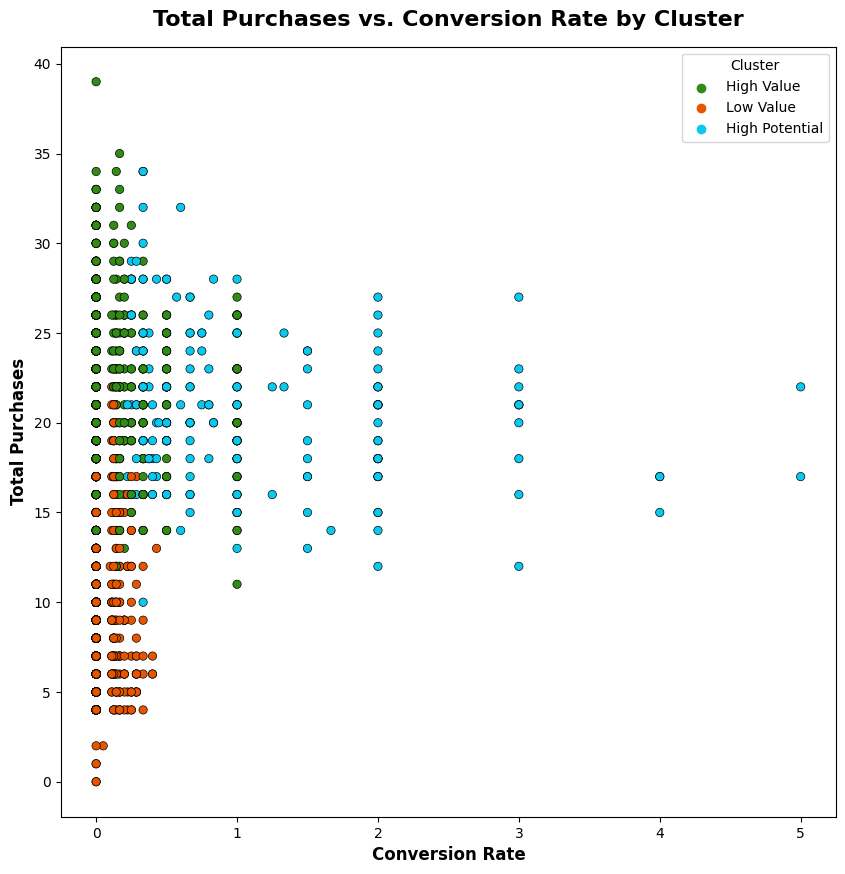

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Conversion_Rate', y = 'Total_Purchases', data = df_clean, hue = 'Cluster', palette = ['#318c15', '#e85500', '#0ac9f0'], edgecolor = 'black')
plt.ylabel('Total Purchases', fontsize=12, fontweight = 'bold')
plt.xlabel('Conversion Rate', fontsize=12, fontweight = 'bold')
plt.title('Total Purchases vs. Conversion Rate by Cluster', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

## Total Spending vs. Conversion Rate by cluster

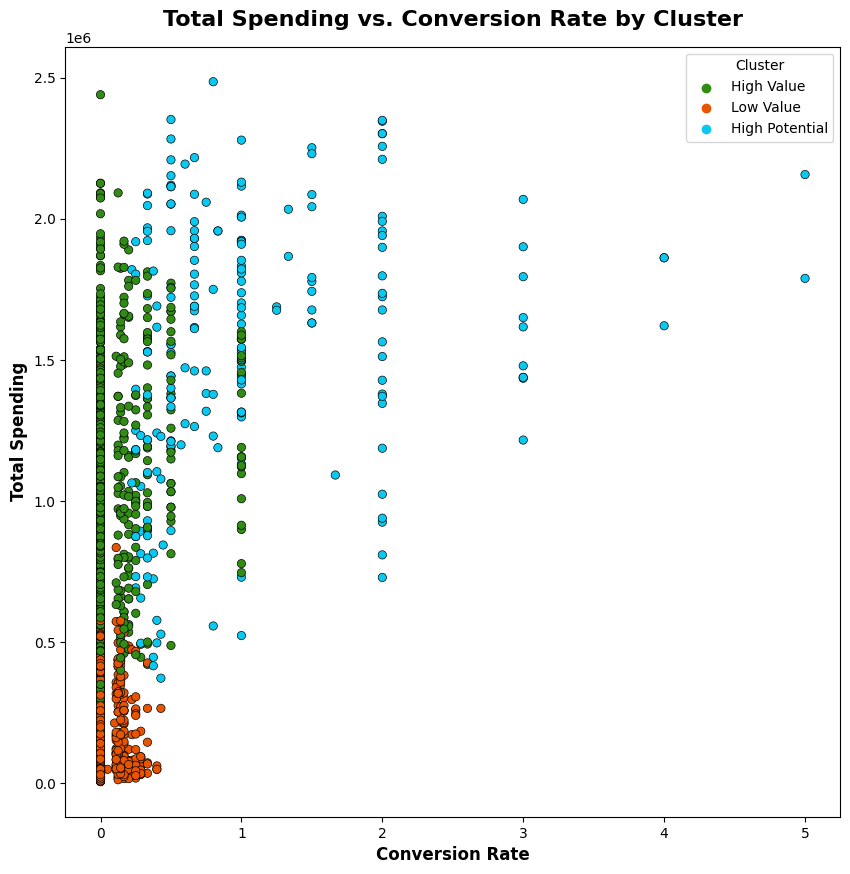

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Conversion_Rate', y = 'Total_Spending', data = df_clean, hue = 'Cluster', palette = ['#318c15', '#e85500', '#0ac9f0'], edgecolor = 'black')
plt.ylabel('Total Spending', fontsize=12, fontweight = 'bold')
plt.xlabel('Conversion Rate', fontsize=12, fontweight = 'bold')
plt.title('Total Spending vs. Conversion Rate by Cluster', fontsize=16, fontweight = 'bold', pad = 15)
plt.show()

## Income vs. Conversion Rate by cluster

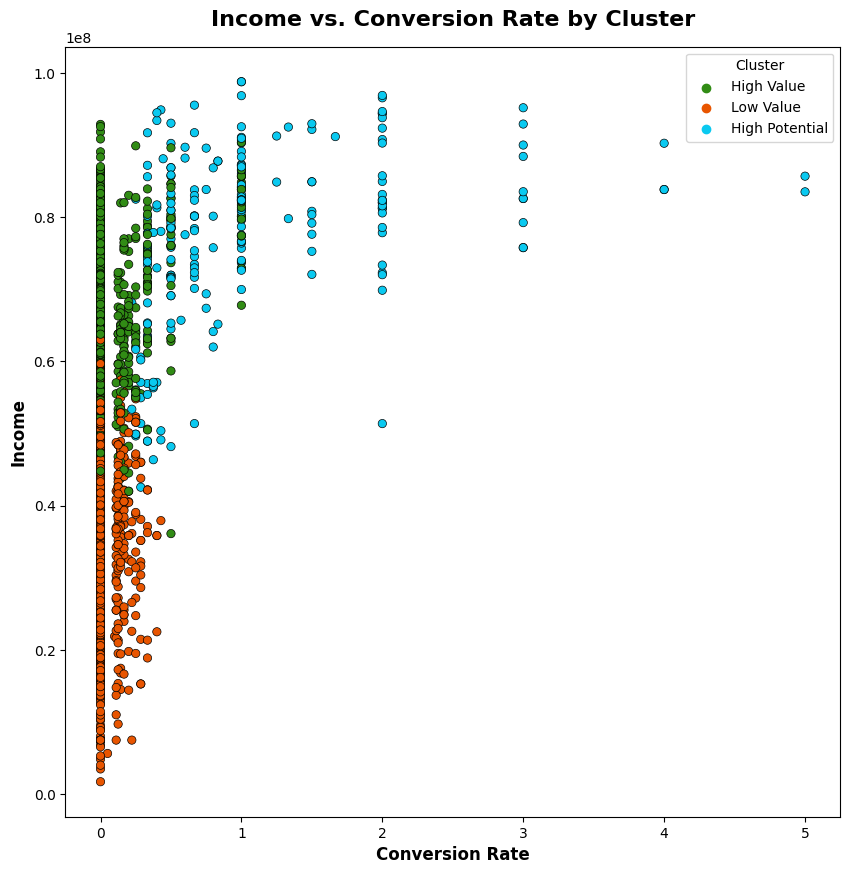

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Conversion_Rate', y = 'Income', data = df_clean, hue = 'Cluster', palette = ['#318c15', '#e85500', '#0ac9f0'], edgecolor = 'black')
plt.ylabel('Income', fontsize=12, fontweight = 'bold')
plt.xlabel('Conversion Rate', fontsize=12, fontweight = 'bold')
plt.title('Income vs. Conversion Rate by Cluster', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

## Customer cluster analysis

**After looking at the descriptive statistics and all of the plots above, the following analysis of the customer clusters are obtained:**
- **High Value Cluster:**
  - Has 851 customers and consists of 38% of the entire customer base.
  - Oldest cluster by age, dominated by middle aged and adult customers.
  - Highest spender on gold products on average, beating out even the highest spending cluster. A close 2nd on fish products.
  - Most purchases overall on average.
  - Least recent cluster (50.3 days)
  - "Meat of the sandwich" cluster
****
- **High Potential Cluster:**
  - Has 212 customers and consists of 10% of the entire customer base.
  - Dominated by young adult and middle aged customers.
  - Highest spending cluster overall on average.
  - Highest earning cluster overall (Rp. 79,7 million) on average.
  - Most web purchases of all the clusters on average.
  - Most loyal cluster, accepted more campaigns on average.
  - Most recent cluster with an average of 46 days.
  - Least active cluster with an average of 3 web visits in the last month.
  - Highest conversion rate of all clusters (1 on average).
  - Gold mine cluster
****
- **Low Value Cluster:**
  - Majority cluster, has 1153 customers and consists of 52% of the entire customer base.
  - Youngest cluster by age, dominated by young adults and adults.
  - Most children of all the clusters (1.2 children on average).
  - Most active cluster with an average of 7 web visits last month.
  - Close 2nd for most deals purchases with 2.25 on average.
  - Lowest earning cluster overall (Rp. 35,5 million) on average.
  - Lowest spending cluster overall on average.
  - Least purchases overall on average.
  - Least loyal cluster, accepted least number of campaigns on average.
  - Lowest conversion rate of all clusters (0.03 on average).
  - "Low value high quantity" cluster.


## Recommendations

**High Value Customers:**

- Personalized Marketing: Leverage customer data to create personalized marketing campaigns and product recommendations, especially focusing on products that are favourites (e.g., Gold products and Fish Products).

- Upselling: Identify high-margin products and promote them to this cluster. Upsell premium and gold products to take advantage of their higher spending tendencies.

- Product Bundles: Encourage the purchase of complementary products by offering bundled deals. For instance, if a customer buys meat products, suggest adding fish or sweet products to their cart with a discount.

- Product Expansion: Explore expanding product lines to cater to older demographics and their preferences, as they have a higher mean age.

**High Potential Customers:**

- Loyalty Programs: Since this cluster shows high spending and conversion rates, consider implementing loyalty programs to reward and retain these valuable customers (e.g., exclusive memberships and VIP programs).

- Market Diversification: Explore opportunities to expand into related markets, as these customers have high spending capacities and show a willingness to spend on various categories.

- Exclusive Offers: Offer exclusive, high-end, and limited-edition products to tap into their spending capacity and increase their number of purchases.

- Customer Engagement: Engage with these customers through various channels and maintain a strong online presence, as they tend to make web purchases.

**Low Value Customers:**

- Youth-Centric Products: Given the relatively young age of customers in this cluster, develop products and services that resonate with younger demographics.

- Personalized Web Experience: Utilize data on their frequent web visits to personalize their online shopping experience. Recommend products based on their browsing history and past purchases to increase conversion rates.

- Family-Oriented Marketing: Given the relatively high number of children, Consider bundling products or offering family-oriented deals, as they might be family-oriented shoppers.

- Price-Sensitive Offers: Focus on offering value-for-money deals and discounts, as these customers have lower incomes and tend to buy deals.

- Educational Campaigns: To increase engagement and conversion rates, provide educational content about the benefits of different products. Highlight the nutritional value and diverse uses of sweet products in their daily life.

- Customer Retention: Focus on retaining this customer base by providing excellent customer service and building long-term loyalty.

## Potential impact of retargeted marketing on marketing cost and revenue (ROI)

**If we focus on the high potential customers and target the campaigns to them exclusively we will see a massive improvement on marketing ROI.**

**Note: ROI = (Total Revenue - Total Marketing Cost)/Total Marketing Cost**

### ROI before retargeting

In [ ]:
df_clean = df_clean.copy()
df_clean['total_revenue'] = df['Total_Acc']*df['Z_Revenue']
df_clean['total_cost'] = df['Z_CostContact']*6
df_impact = df_clean.groupby('Cluster')[['total_revenue', 'total_cost']].sum().reset_index()
# df_impact['ROI'] = (df_impact['total_revenue']-df_impact['total_cost'])/(df_impact['total_cost'])*100
roi = round((df_impact['total_revenue'].sum()-df_impact['total_cost'].sum())/df_impact['total_cost'].sum()*100, 2)
print(f'ROI before retargeted marketing: {roi}%')

ROI before retargeted marketing: -73.08%


### ROI after retargeting

In [ ]:
df_clean = df_clean.copy()
df_clean['total_revenue'] = df['Total_Acc']*df['Z_Revenue']
df_clean['total_cost'] = df['Z_CostContact']*6
df_impact = df_clean.groupby('Cluster')[['total_revenue', 'total_cost']].sum().reset_index()
df_impact = df_impact[df_impact['Cluster']=='High Potential']
# df_impact['ROI'] = (df_impact['total_revenue']-df_impact['total_cost'])/(df_impact['total_cost'])*100
roi = round((df_impact['total_revenue'].sum()-df_impact['total_cost'].sum())/df_impact['total_cost'].sum()*100, 2)
print(f'ROI after retargeted marketing: {roi}%')

ROI after retargeted marketing: 57.1%


**Conclusion:**

By retargeting the campaigns to "High Potential Customers" we have improved the marketing ROI massively.